# Imports


In [1]:
library(tidyverse)
library(data.table)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'data.table' was built under R version 3.6.3"
Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

The following object is masked from 'package:purrr':

    transpose



# Read data

In [2]:
df_raw = readxl::read_excel('C:/Users/eduar/Desktop/IME/2021/CEA/7.3 Camila 2  dados uréia urinária.xlsx')

head(df_raw)

New names:
* `` -> ...324


número,D_IRA,idade,cor,peso,altura,imc,has,dm,icc,...,uU/uCr (g/L/g/L) D7,uNa/uCr (mEq/l/g/L) D7,UV Na 6h (mEq) D7,UV Na 24h (mEq) D7,uNa+uK (mEq/L) D7,uU (mmol/L) D7,(uNa+uK) X 2 + uU (mmol/L) D7,FENa (%) D7,FEK (%) D7,sU/sCr (mg/dL/mg/dL) D7
4,D2,51,1,58.5,1.75,19.10204,0,0,0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,D2,82,1,72.0,1.75,23.51020,1,0,0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
23,D2,50,1,110.0,1.70,38.06228,1,1,1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
26,D2,79,1,46.0,1.55,19.14672,0,0,0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
31,D2,26,1,60.0,1.75,19.59184,0,0,0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
46,D2,54,2,55.0,1.65,20.20202,1,0,0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [3]:
categorical_columns = c('D_IRA', 'cor', 'has', 'dm', 'icc',
                        'asma_dpoc', 'hiv', 'ca_ativo', 'avc', 
                        'dvp', 'drogadicao', 'ventilacao_mecanica',
                        'diureticos', 'vasopressina', 'iSRAA',
                        'Causa da IRA / Exposição', 'KDIGO'
                        )

missing_categorical_columns = c('criterio_IRA', 'pos_operatorio', 'mortalidade_intra_hospitalar')

daily_columns = c('Diurese ml/kg/h',
                  'BH (mL/24h)',
                  'SOFA',
                  'sU (mg/dL)',
                  'sCr (mg/dL)',
                  'sNa (mEq/L)',
                  'sK (mEq/L)',
                  'sOsm (mOsm/L)',
                  'uU (g/L)',
                  'uCr (g/L)',
                  'uNa (mEq/L)',
                  'uK (mEq/L)',
                  'Volume urinário (mL/24h)',
                  'UV U6h (g)',
                  'UV U24h (g)',
                  'FEU (%)',
                  'uU/uCr (g/L/g/L)',
                  'uNa/uCr (mEq/L/g/L)',
                  'UV Na 6h (mEq)',
                  'UV Na 24h (mEq)',
                  'uOsm (mOsm/Kg)',
                  'uNa+uK (mEq/L)',
                  'uU (mmol/L)',
                  '(uNa+uK) X 2 + uU (mmol/L)',
                  'FENa (%)',
                  'FEK (%)',
                  'sU/sCr (mg/dL/mg/dL)')
                  

missing_daily_columns = c('uU/sU',
                          'sCrIRA_delta_sCrbasal')

# Wrangling

In [7]:
columns = colnames(df_raw)
una_ucr_cols = columns[grepl(paste0("^", gsub("([\\(\\)])", "\\\\\\1", 'uNa/uCr')), columns)]
setnames(df_raw, old = una_ucr_cols, new = str_replace(una_ucr_cols, 'l', 'L'))

df = df_raw %>%
    mutate_at(categorical_columns, funs(factor(.))) %>%
    mutate(IRA = factor(ifelse(D_IRA == 'SEM IRA', 0, 1)),
           KDIGO = factor(KDIGO),
           KDIGO_agrupado = case_when(KDIGO %in% c(2, 3) ~ "MODERADO/GRAVE",
                                      KDIGO == 1 ~ "LEVE",
                                      KDIGO == 0 ~ "SEM IRA")) %>%
    rename(`BH (mL/24h) D-2` = `BH  (ml/24h) D-2`,
           `uU/uCr (g/L/g/L) D-1` = `uU/uCr (g/L /g/L) D-1`,
           `BH (mL/24h) D-4` = `BH (mL/24h)D-4`,
           `uNa/uCr (mEq/L/g/L) D-1` = `uNa/uCr (mEq/L/g/L)D-1`,
           `uU/uCr (g/L/g/L) D-3` = `uU/uCr (g/L/g/L)D-3`)

df %>%
    head()

número,D_IRA,idade,cor,peso,altura,imc,has,dm,icc,...,UV Na 6h (mEq) D7,UV Na 24h (mEq) D7,uNa+uK (mEq/L) D7,uU (mmol/L) D7,(uNa+uK) X 2 + uU (mmol/L) D7,FENa (%) D7,FEK (%) D7,sU/sCr (mg/dL/mg/dL) D7,IRA,KDIGO_agrupado
4,D2,51,1,58.5,1.75,19.10204,0,0,0,...,NA,NA,NA,NA,NA,NA,NA,NA,1,LEVE
7,D2,82,1,72.0,1.75,23.51020,1,0,0,...,NA,NA,NA,NA,NA,NA,NA,NA,1,LEVE
23,D2,50,1,110.0,1.70,38.06228,1,1,1,...,NA,NA,NA,NA,NA,NA,NA,NA,1,LEVE
26,D2,79,1,46.0,1.55,19.14672,0,0,0,...,NA,NA,NA,NA,NA,NA,NA,NA,1,MODERADO/GRAVE
31,D2,26,1,60.0,1.75,19.59184,0,0,0,...,NA,NA,NA,NA,NA,NA,NA,NA,1,LEVE
46,D2,54,2,55.0,1.65,20.20202,1,0,0,...,NA,NA,NA,NA,NA,NA,NA,NA,1,LEVE


In [13]:
for (col in daily_columns){
    df = df %>%
        mutate(!!col := if_else(IRA == 1, !!sym(paste(col, 'D-1')), 
                                !!sym(paste(col, 'Média D1-D5'))))
}

df %>% select(daily_columns)

Diurese ml/kg/h,BH (mL/24h),SOFA,sU (mg/dL),sCr (mg/dL),sNa (mEq/L),sK (mEq/L),sOsm (mOsm/L),uU (g/L),uCr (g/L),...,uNa/uCr (mEq/L/g/L),UV Na 6h (mEq),UV Na 24h (mEq),uOsm (mOsm/Kg),uNa+uK (mEq/L),uU (mmol/L),(uNa+uK) X 2 + uU (mmol/L),FENa (%),FEK (%),sU/sCr (mg/dL/mg/dL)
0.8000000,932.0000,3.0000000,59.00000,1.7200000,144.0000,4.600000,297.8333,7.800000,0.8300000,...,128.915663,29.96000,119.84000,483.0000,133.0000,129.95147,395.95147,1.53982597,11.712939,34.30233
1.4400000,-670.0000,3.0000000,54.00000,0.6300000,127.0000,3.200000,263.0000,11.700000,1.5900000,...,14.465409,14.26000,57.04000,598.0000,111.0000,194.92720,416.92720,0.07175754,10.896226,85.71429
0.7196970,739.0000,3.0000000,133.00000,0.9300000,139.0000,4.500000,300.1667,9.940000,0.5420000,...,33.579336,8.64500,34.58000,349.0000,78.7000,165.60482,323.00482,0.22466750,23.068881,143.01075
1.2681159,228.0000,5.0000000,55.00000,0.6900000,135.0000,3.500000,279.1667,8.090000,0.7950000,...,121.761006,33.88000,135.52000,367.0000,136.1000,134.78299,406.98299,0.62233403,9.745553,79.71014
0.5555556,-82.0000,2.0000000,27.00000,0.9100000,141.0000,4.600000,286.5000,16.420000,2.1010000,...,10.423608,4.38000,17.52000,669.0000,137.2000,273.56450,547.96450,0.06727293,10.856424,29.67033
1.8181818,-314.0000,3.0000000,24.00000,0.6100000,147.0000,4.000000,298.0000,26.580000,1.0734000,...,58.226197,37.50000,150.00000,899.0000,123.4000,442.83461,689.63461,0.24161891,8.652180,39.34426
0.9493671,-891.0000,4.0000000,38.00000,0.7100000,129.0000,3.300000,264.3333,17.240000,0.8427000,...,87.575650,33.21000,132.84000,592.0000,109.0000,287.22606,505.22606,0.48200551,8.986986,53.52113
0.6944444,950.0000,3.0000000,18.00000,0.8400000,139.0000,4.600000,281.0000,3.342000,1.4250000,...,72.280702,25.75000,103.00000,323.0000,171.0000,55.67920,397.67920,0.43680424,8.713959,21.42857
0.5169562,476.0000,2.0000000,37.00000,0.9900000,141.0000,4.200000,288.1667,9.566000,0.6020000,...,20.598007,3.10000,12.40000,211.0000,28.7000,159.37381,216.77381,0.14462430,6.382297,37.37374
1.2500000,230.0000,4.0000000,21.00000,0.5800000,143.0000,5.000000,289.5000,15.193000,1.2180000,...,39.901478,29.16000,116.64000,549.0000,99.6000,253.12213,452.32213,0.16183816,4.857143,36.20690


In [28]:
df %>%
    select(matches("D-?\\d")) %>%
    names

[1] "Diurese ml/kg/h D-4"                     
  [2] "BH (mL/24h) D-4"                         
  [3] "SOFA D-4"                                
  [4] "sU (mg/dL) D-4"                          
  [5] "sCr (mg/dL) D-4"                         
  [6] "sNa (mEq/L) D-4"                         
  [7] "sK (mEq/L) D-4"                          
  [8] "sOsm (mOsm/L) D-4"                       
  [9] "uU (g/L) D-4"                            
 [10] "uCr (g/L) D-4"                           
 [11] "uNa (mEq/L) D-4"                         
 [12] "uK (mEq/L) D-4"                          
 [13] "Volume urinário (mL/24h) D-4"            
 [14] "UV U6h (g) D-4"                          
 [15] "UV U24h (g) D-4"                         
 [16] "FEU (%) D-4"                             
 [17] "uU/uCr (g/L/g/L) D-4"                    
 [18] "uNa/uCr (mEq/L/g/L) D-4"                 
 [19] "UV Na 6h (mEq) D-4"                      
 [20] "UV Na 24h (mEq) D-4"                     
 [21] "uOsm (mOsm/Kg) D-4"                      
 [22] "uNa+uK (mEq/L) D-4"                      
 [23] "uU (mmol/L) D-4"                         
 [24] "(uNa+uK) X 2 + uU (mmol/L) D-4"          
 [25] "FENa (%) D-4"                            
 [26] "FEK (%) D-4"                             
 [27] "sU/sCr (mg/dL/mg/dL) D-4"                
 [28] "Diurese ml/kg/h D-3"                     
 [29] "BH (mL/24h) D-3"                         
 [30] "SOFA D-3"                                
 [31] "sU (mg/dL) D-3"                          
 [32] "sCr (mg/dL) D-3"                         
 [33] "sNa (mEq/L) D-3"                         
 [34] "sK (mEq/L) D-3"                          
 [35] "sOsm (mOsm/L) D-3"                       
 [36] "uU (g/L) D-3"                            
 [37] "uCr (g/L) D-3"                           
 [38] "uNa (mEq/L) D-3"                         
 [39] "uK (mEq/L) D-3"                          
 [40] "Volume urinário (mL/24h) D-3"            
 [41] "UV U6h (g) D-3"                          
 [42] "UV U24h (g) D-3"                         
 [43] "FEU (%) D-3"                             
 [44] "uU/uCr (g/L/g/L) D-3"                    
 [45] "uNa/uCr (mEq/L/g/L) D-3"                 
 [46] "UV Na 6h (mEq) D-3"                      
 [47] "UV Na 24h (mEq) D-3"                     
 [48] "uOsm (mOsm/Kg) D-3"                      
 [49] "uNa+uK (mEq/L) D-3"                      
 [50] "uU (mmol/L) D-3"                         
 [51] "(uNa+uK) X 2 + uU (mmol/L) D-3"          
 [52] "FENa (%) D-3"                            
 [53] "FEK (%) D-3"                             
 [54] "sU/sCr (mg/dL/mg/dL) D-3"                
 [55] "Diurese ml/kg/h D-2"                     
 [56] "BH (mL/24h) D-2"                         
 [57] "SOFA D-2"                                
 [58] "sU (mg/dL) D-2"                          
 [59] "sCr (mg/dL) D-2"                         
 [60] "sNa (mEq/L) D-2"                         
 [61] "sK (mEq/L) D-2"                          
 [62] "sOsm (mOsm/L) D-2"                       
 [63] "uU (g/L) D-2"                            
 [64] "uCr (g/L) D-2"                           
 [65] "uNa (mEq/L) D-2"                         
 [66] "uK (mEq/L) D-2"                          
 [67] "Volume urinário (mL/24h) D-2"            
 [68] "UV U6h (g) D-2"                          
 [69] "UV U24h (g) D-2"                         
 [70] "FEU (%) D-2"                             
 [71] "uU/uCr (g/L/g/L) D-2"                    
 [72] "uNa/uCr (mEq/L/g/L) D-2"                 
 [73] "UV Na 6h (mEq) D-2"                      
 [74] "UV Na 24h (mEq) D-2"                     
 [75] "uOsm (mOsm/Kg) D-2"                      
 [76] "uNa+uK (mEq/L) D-2"                      
 [77] "uU (mmol/L) D-2"                         
 [78] "(uNa+uK) X 2 + uU (mmol/L) D-2"          
 [79] "FENa (%) D-2"                            
 [80] "FEK (%) D-2"                             
 [81] "sU/sCr (mg/dL/mg/dL) D-2"                
 [82] "Diurese ml/kg/h D-1"      

In [29]:
df = df %>%
    select(-matches("D-?\\d"))

dim(df)

[1] 55 56

In [30]:
head(df)

número,D_IRA,idade,cor,peso,altura,imc,has,dm,icc,...,uNa/uCr (mEq/L/g/L),UV Na 6h (mEq),UV Na 24h (mEq),uOsm (mOsm/Kg),uNa+uK (mEq/L),uU (mmol/L),(uNa+uK) X 2 + uU (mmol/L),FENa (%),FEK (%),sU/sCr (mg/dL/mg/dL)
4,D2,51,1,58.5,1.75,19.10204,0,0,0,...,128.91566,29.960,119.84,483,133.0,129.9515,395.9515,1.53982597,11.712939,34.30233
7,D2,82,1,72.0,1.75,23.51020,1,0,0,...,14.46541,14.260,57.04,598,111.0,194.9272,416.9272,0.07175754,10.896226,85.71429
23,D2,50,1,110.0,1.70,38.06228,1,1,1,...,33.57934,8.645,34.58,349,78.7,165.6048,323.0048,0.22466750,23.068881,143.01075
26,D2,79,1,46.0,1.55,19.14672,0,0,0,...,121.76101,33.880,135.52,367,136.1,134.7830,406.9830,0.62233403,9.745553,79.71014
31,D2,26,1,60.0,1.75,19.59184,0,0,0,...,10.42361,4.380,17.52,669,137.2,273.5645,547.9645,0.06727293,10.856424,29.67033
46,D2,54,2,55.0,1.65,20.20202,1,0,0,...,58.22620,37.500,150.00,899,123.4,442.8346,689.6346,0.24161891,8.652180,39.34426


In [33]:
write.csv(df, "dados_processados.csv", row.names=FALSE, quote=FALSE) 

# Plots

## Count of categorical variables

Warning message:
"Factor `cor` contains implicit NA, consider using `forcats::fct_explicit_na`"Warning message:
"Factor `has` contains implicit NA, consider using `forcats::fct_explicit_na`"

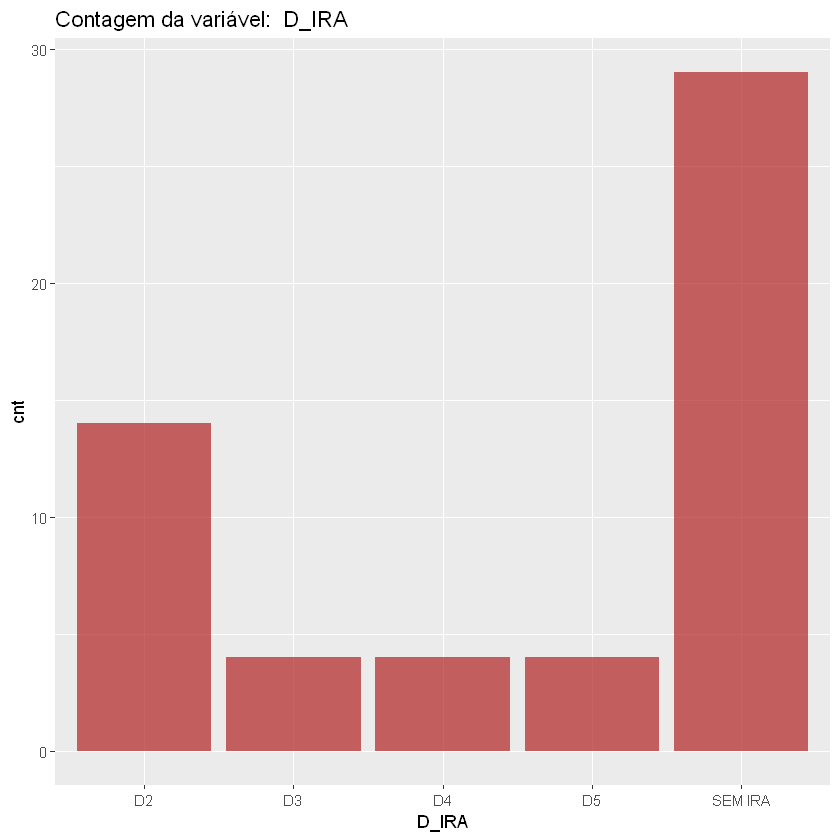

Warning message:
"Factor `dm` contains implicit NA, consider using `forcats::fct_explicit_na`"

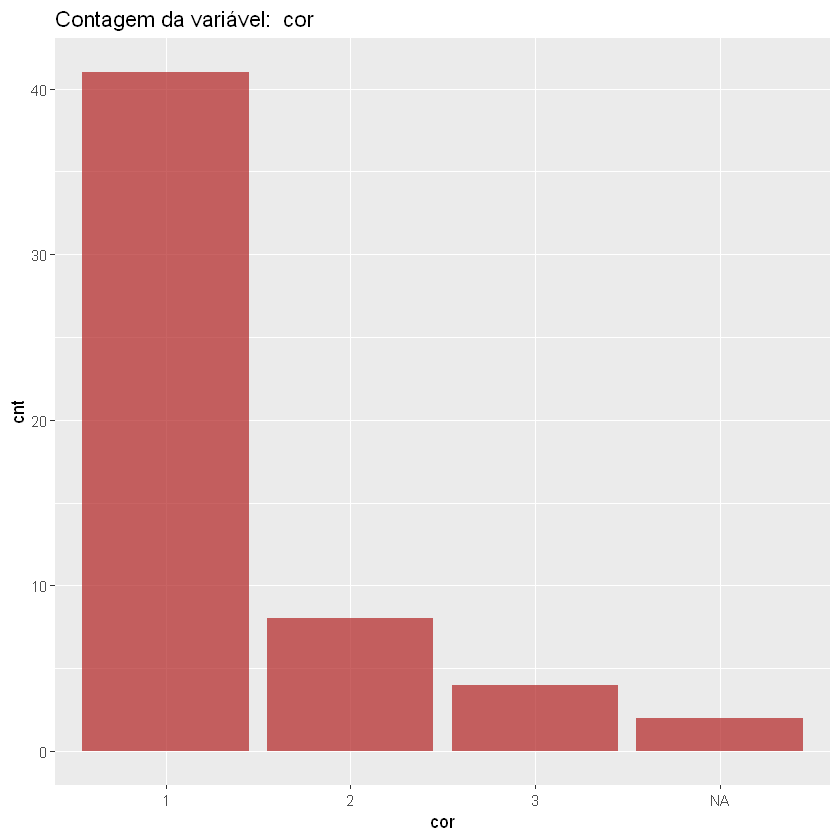

Warning message:
"Factor `icc` contains implicit NA, consider using `forcats::fct_explicit_na`"

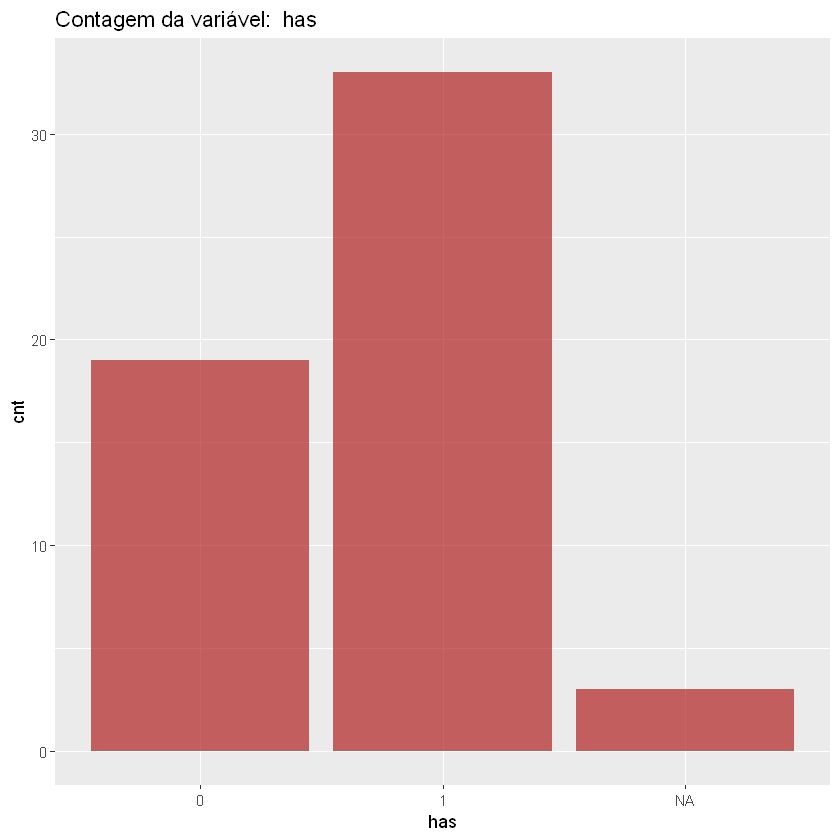

Warning message:
"Factor `asma_dpoc` contains implicit NA, consider using `forcats::fct_explicit_na`"

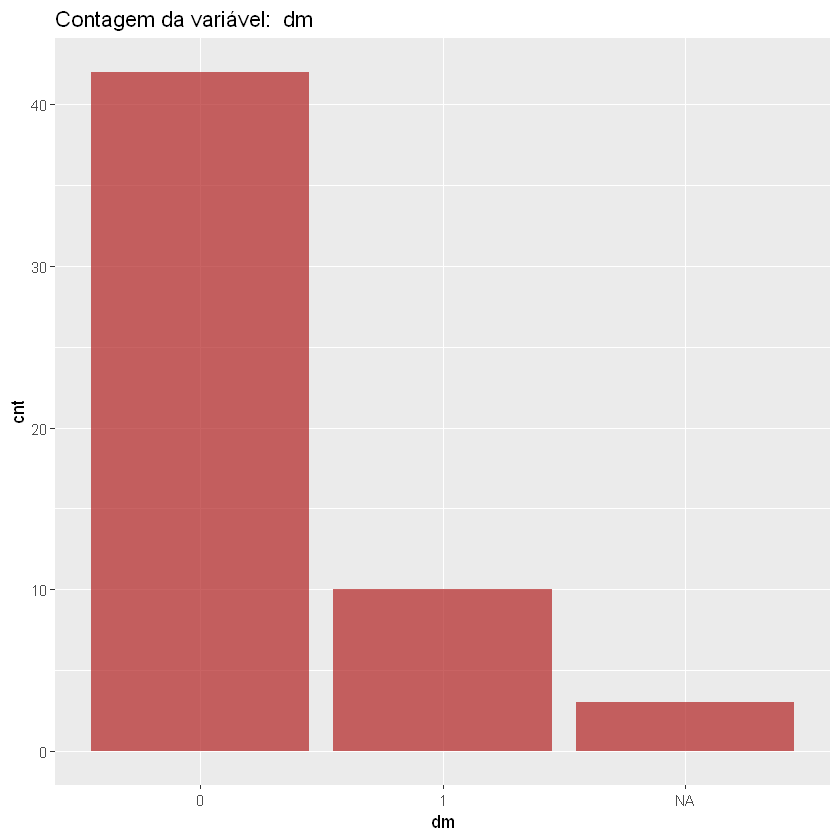

Warning message:
"Factor `hiv` contains implicit NA, consider using `forcats::fct_explicit_na`"

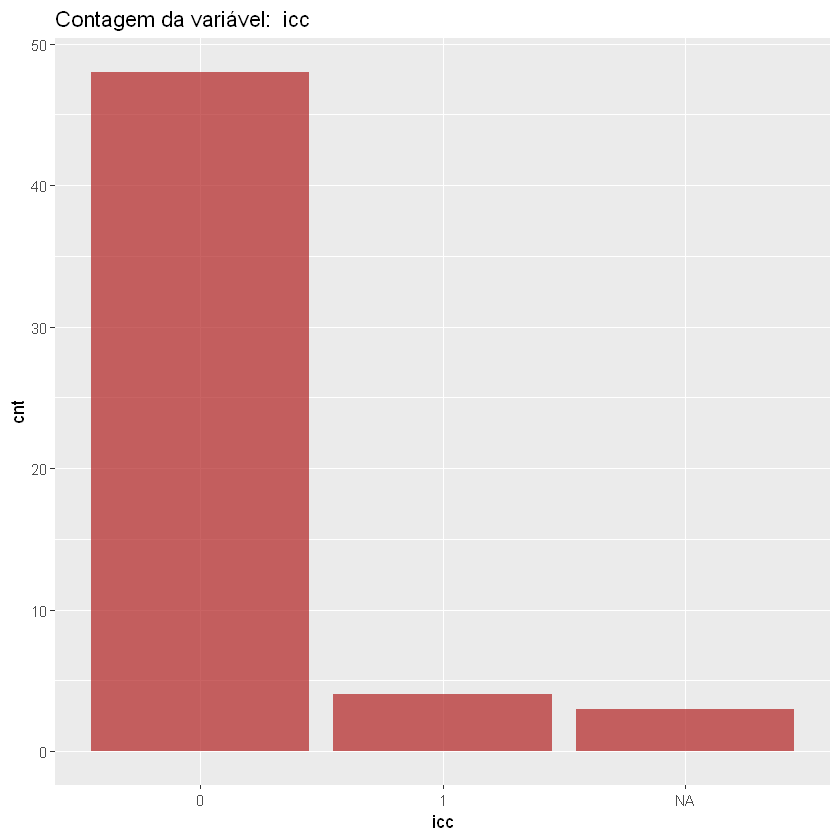

Warning message:
"Factor `ca_ativo` contains implicit NA, consider using `forcats::fct_explicit_na`"

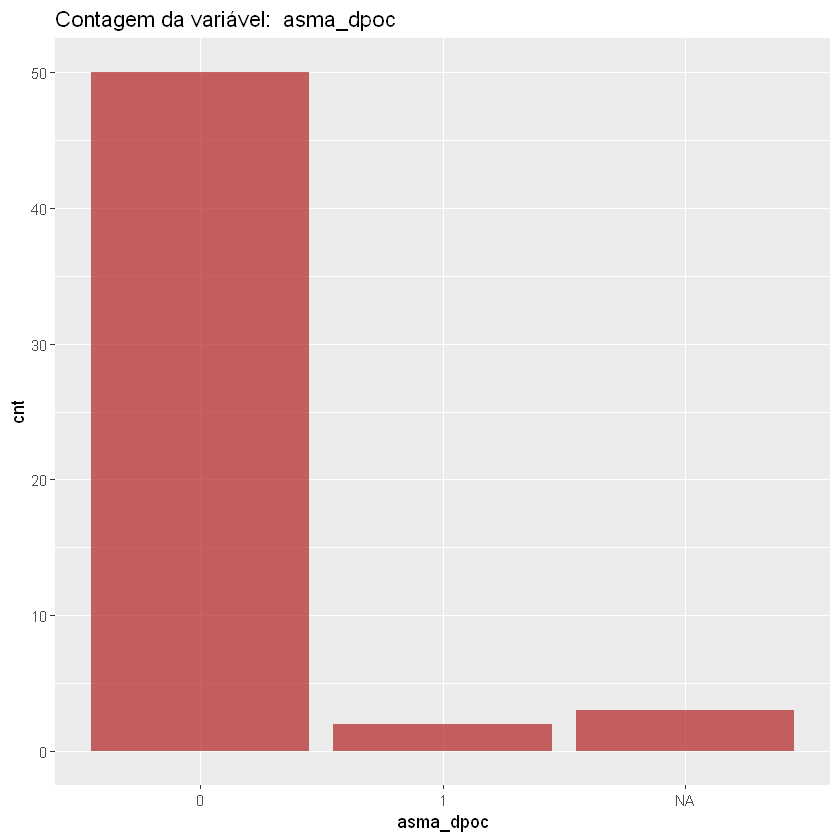

Warning message:
"Factor `avc` contains implicit NA, consider using `forcats::fct_explicit_na`"

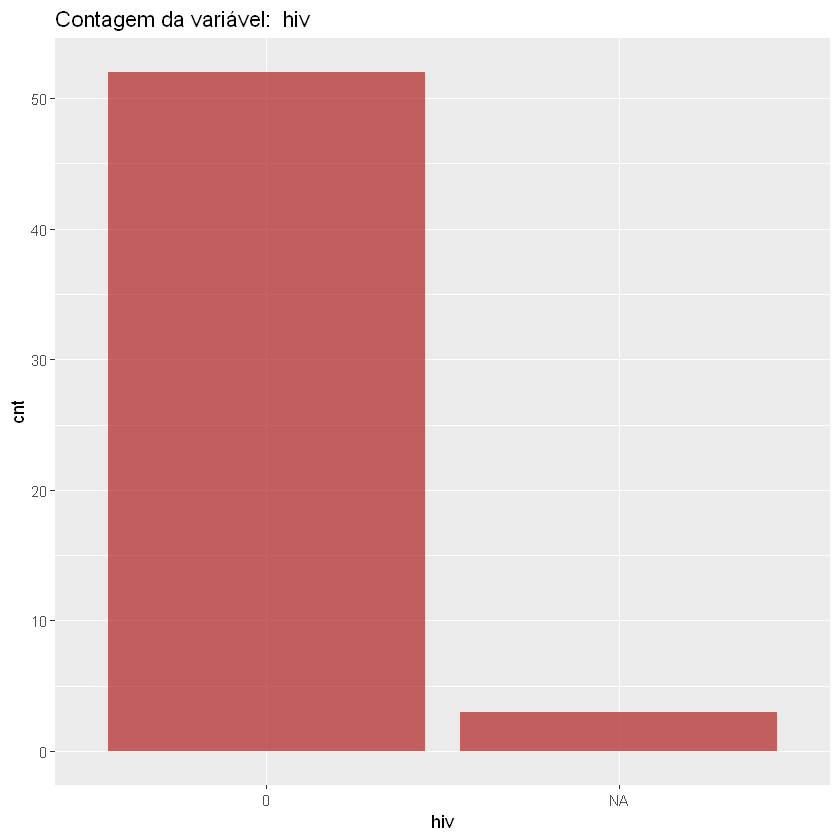

Warning message:
"Factor `dvp` contains implicit NA, consider using `forcats::fct_explicit_na`"

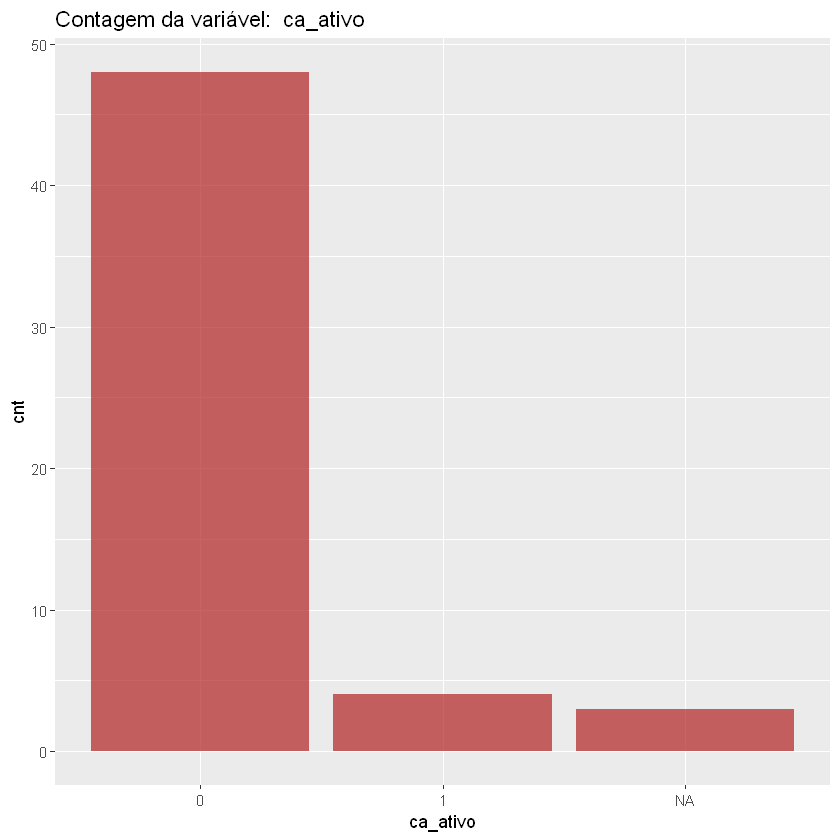

Warning message:
"Factor `drogadicao` contains implicit NA, consider using `forcats::fct_explicit_na`"

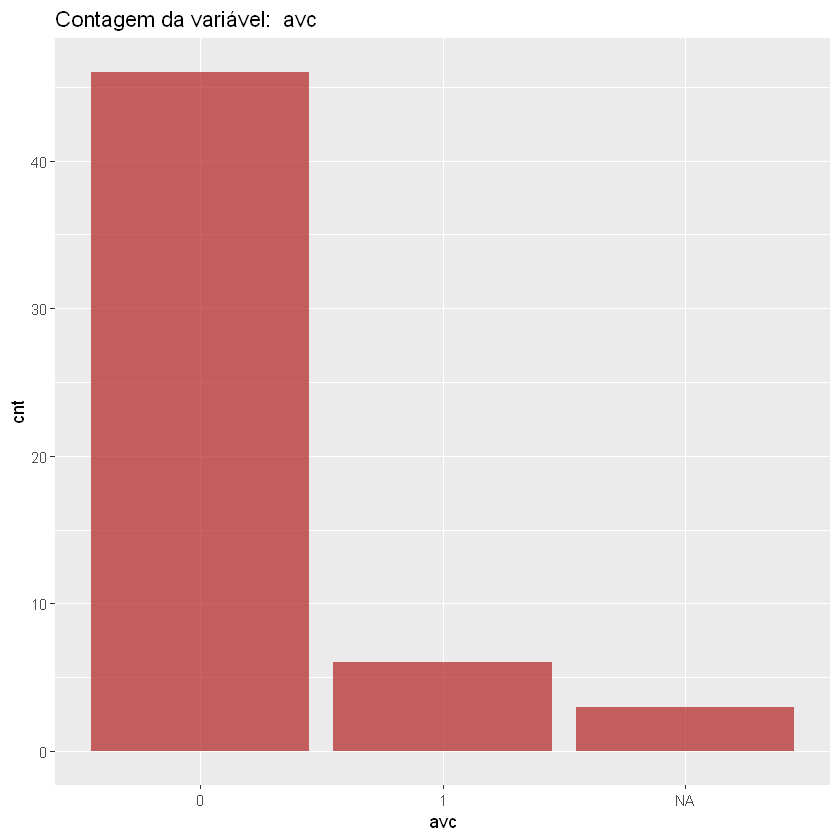

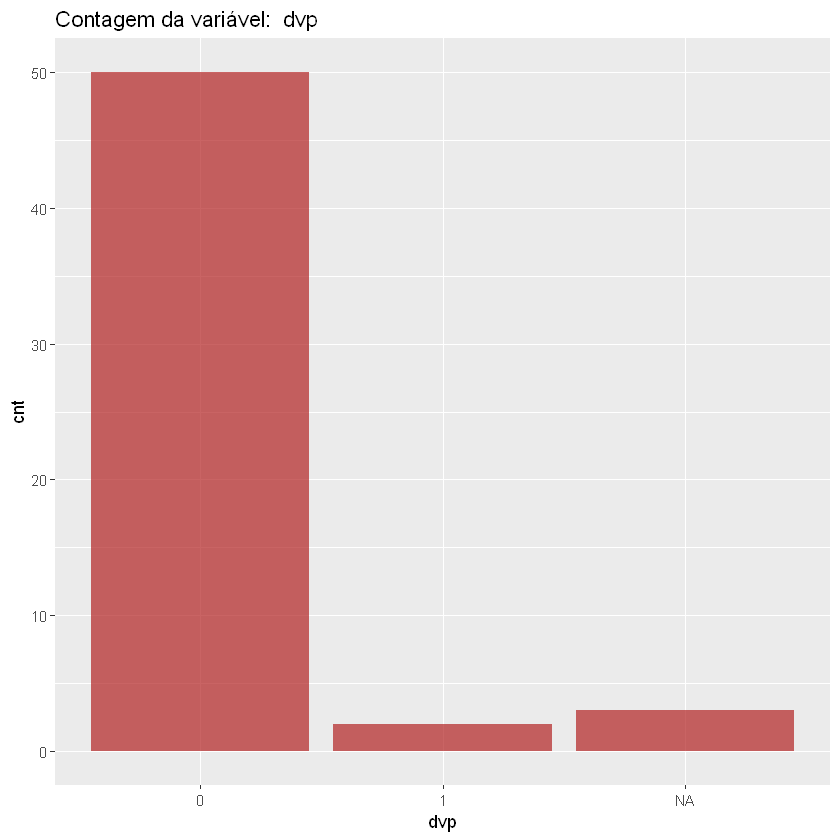

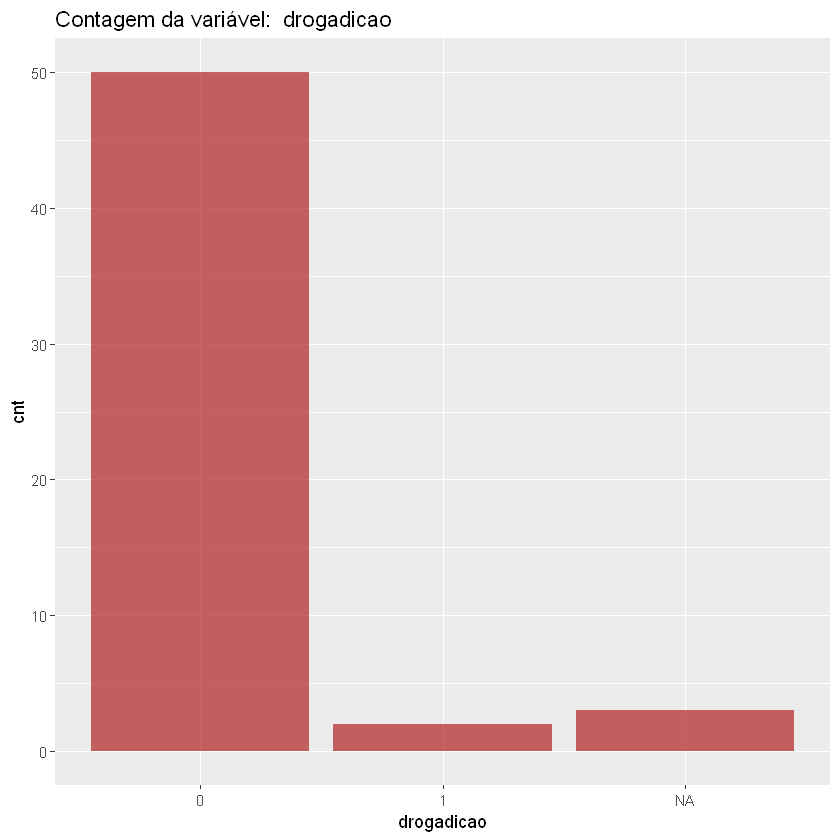

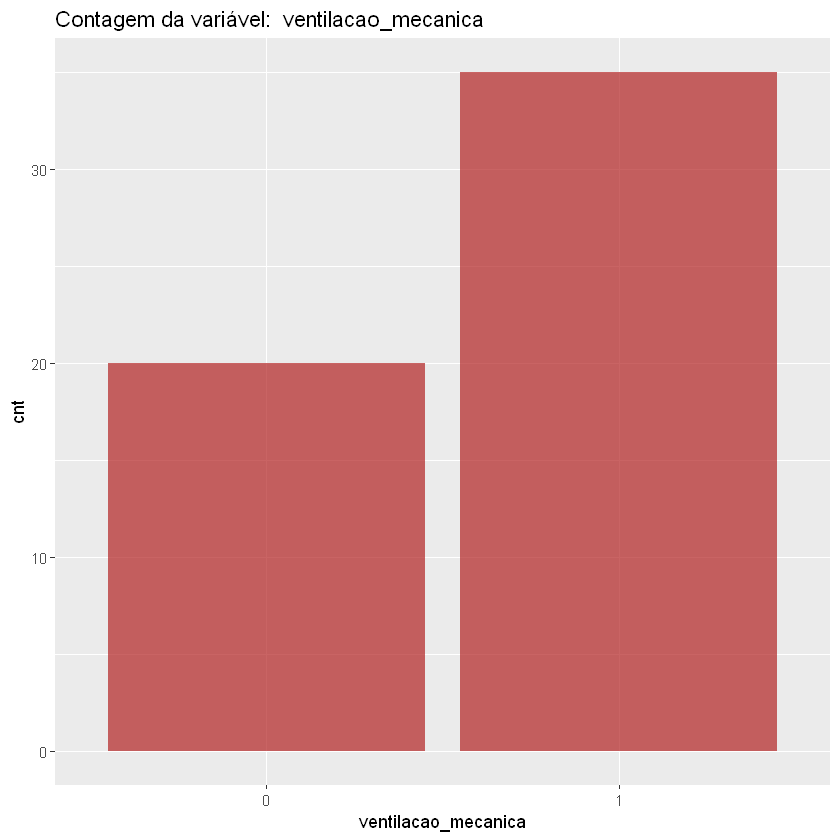

Warning message:
"Factor `iSRAA` contains implicit NA, consider using `forcats::fct_explicit_na`"

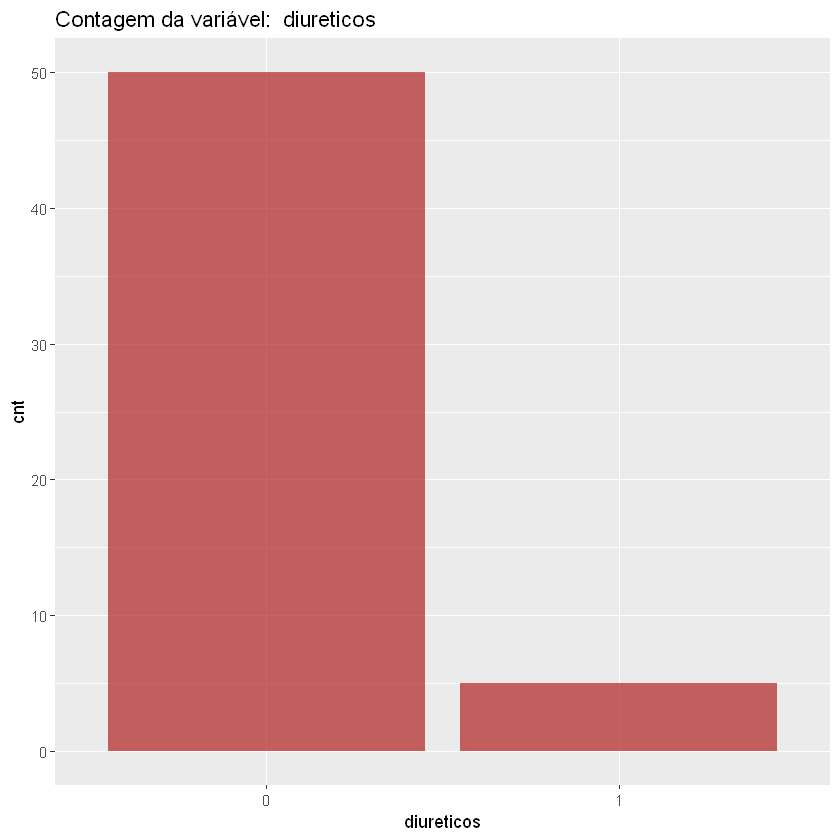

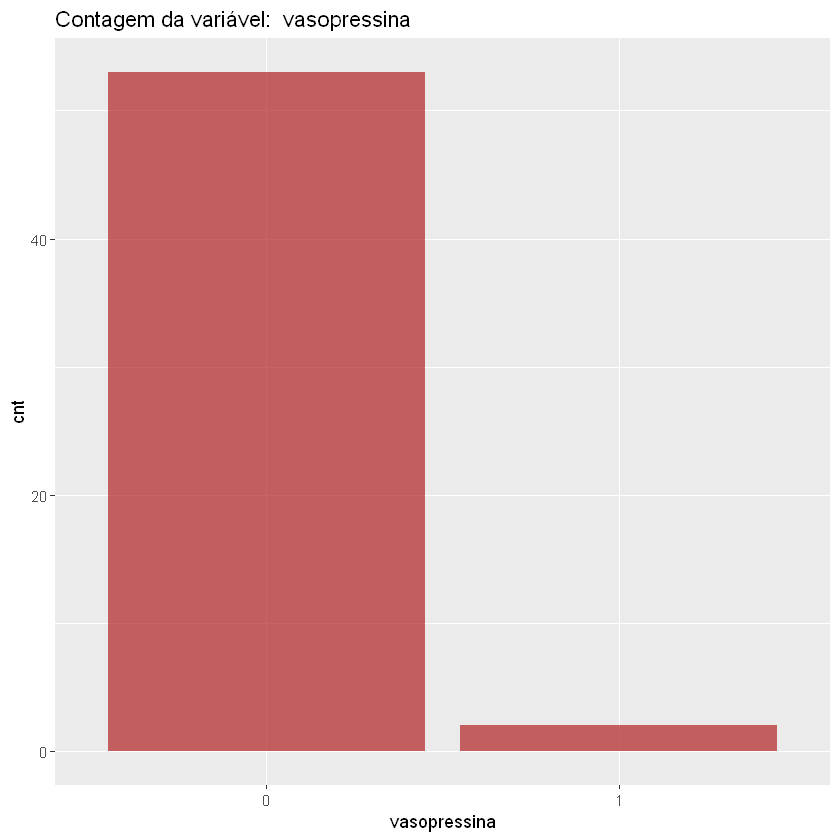

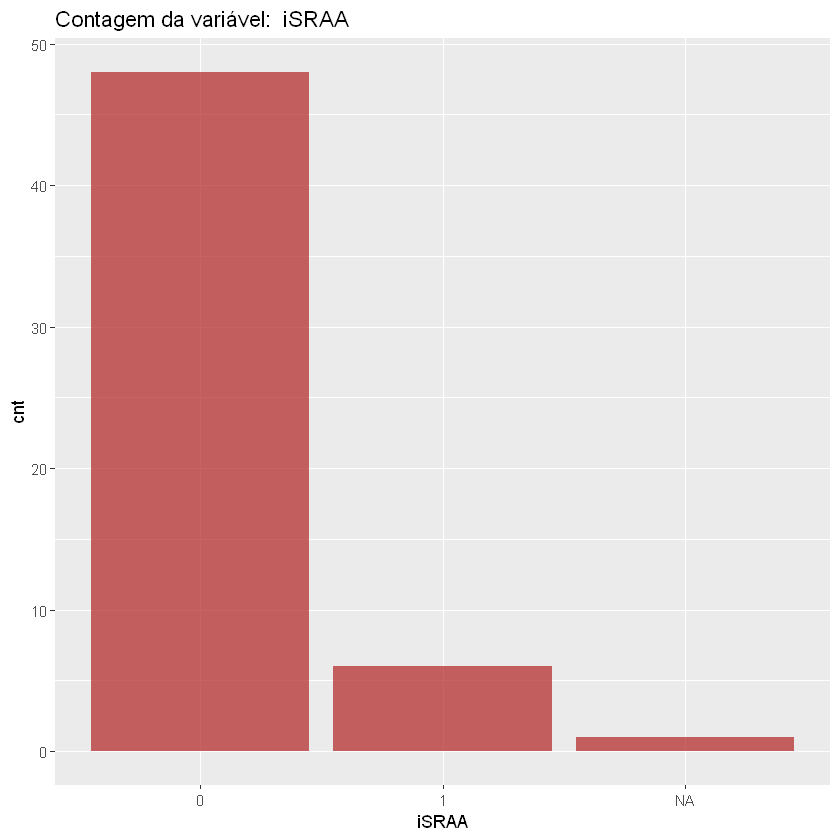

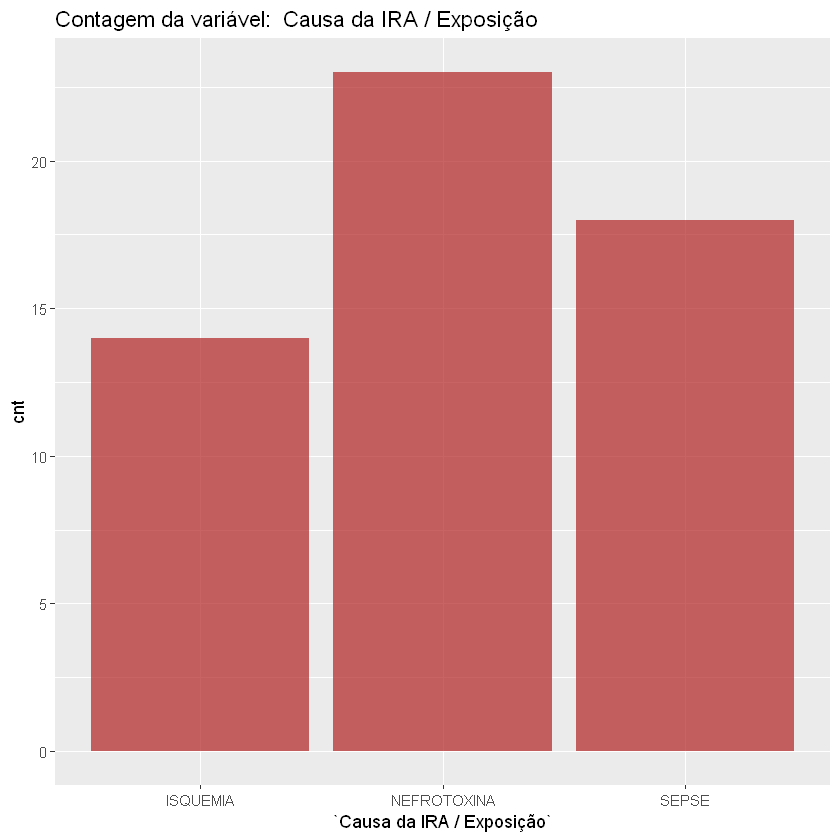

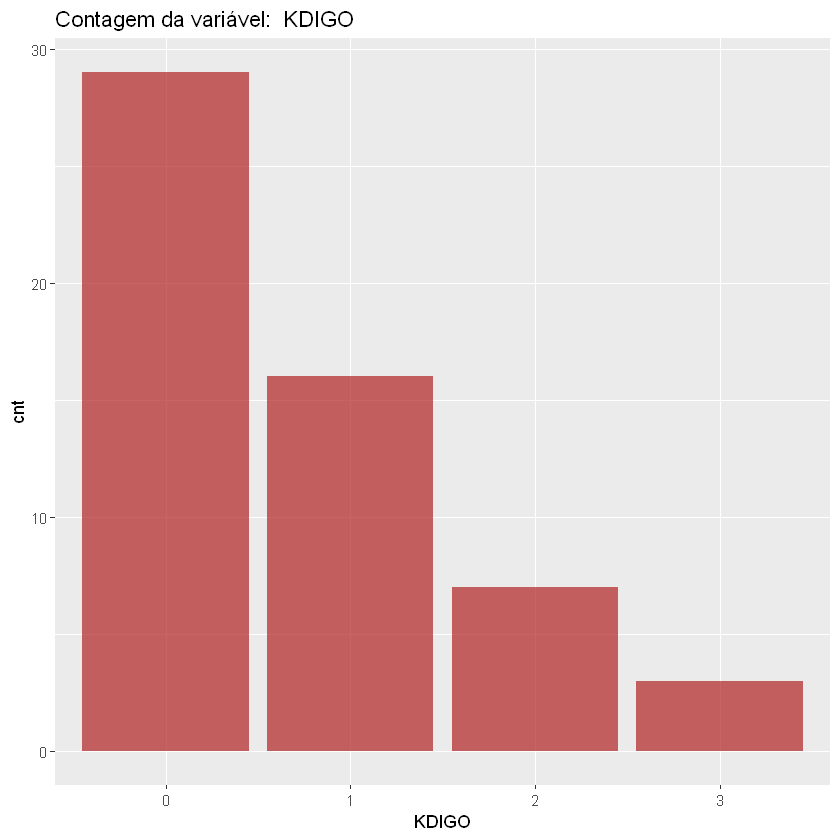

In [88]:
for(column in categorical_columns){
    p = df %>%
        group_by(!!sym(column)) %>%
        summarise(cnt = n()) %>%
        ggplot(aes(x=!!sym(column), y=cnt)) + 
            geom_col(fill='firebrick', alpha=0.7) + 
            labs(title=paste('Contagem da variável: ', column))
    print(p)
}

## Count of categorical variables by outcome

Warning message:
"Factor `cor` contains implicit NA, consider using `forcats::fct_explicit_na`"Warning message:
"Factor `has` contains implicit NA, consider using `forcats::fct_explicit_na`"Warning message:
"Factor `dm` contains implicit NA, consider using `forcats::fct_explicit_na`"

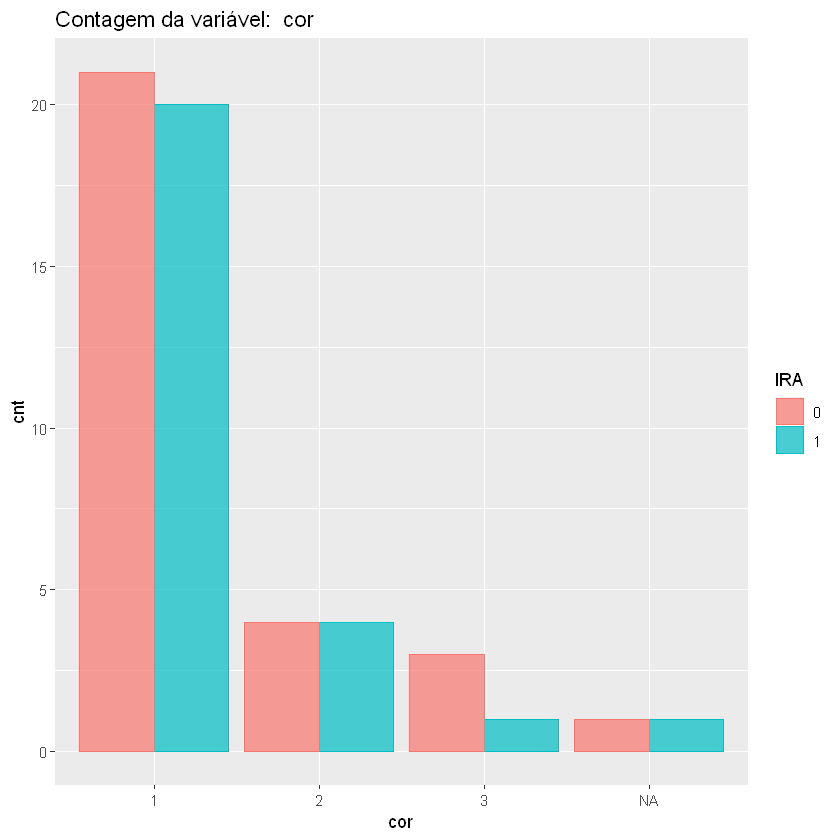

Warning message:
"Factor `icc` contains implicit NA, consider using `forcats::fct_explicit_na`"

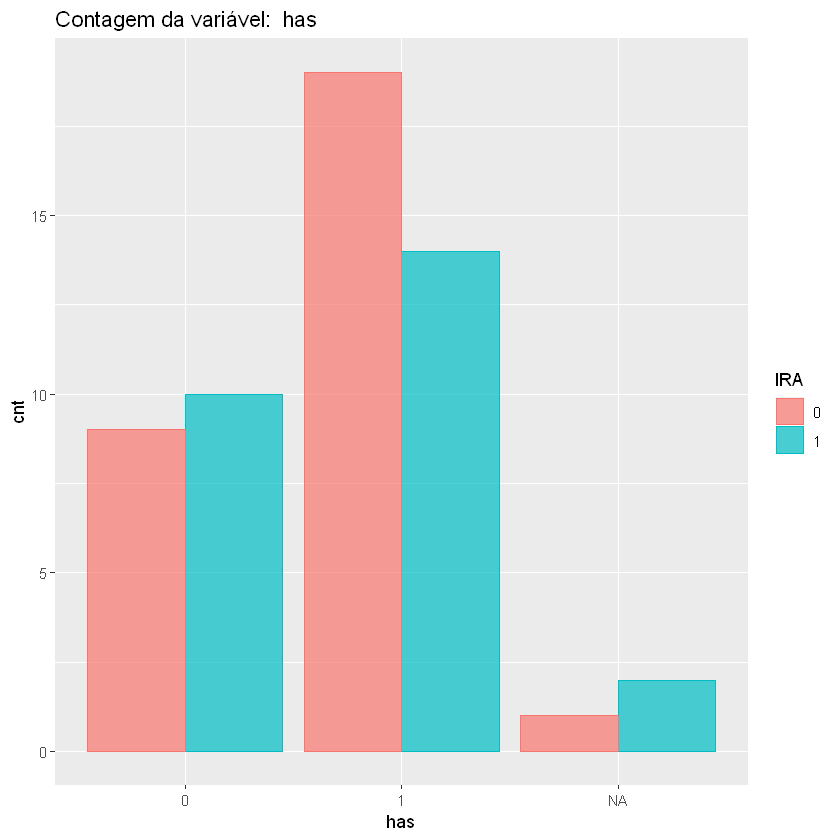

Warning message:
"Factor `asma_dpoc` contains implicit NA, consider using `forcats::fct_explicit_na`"

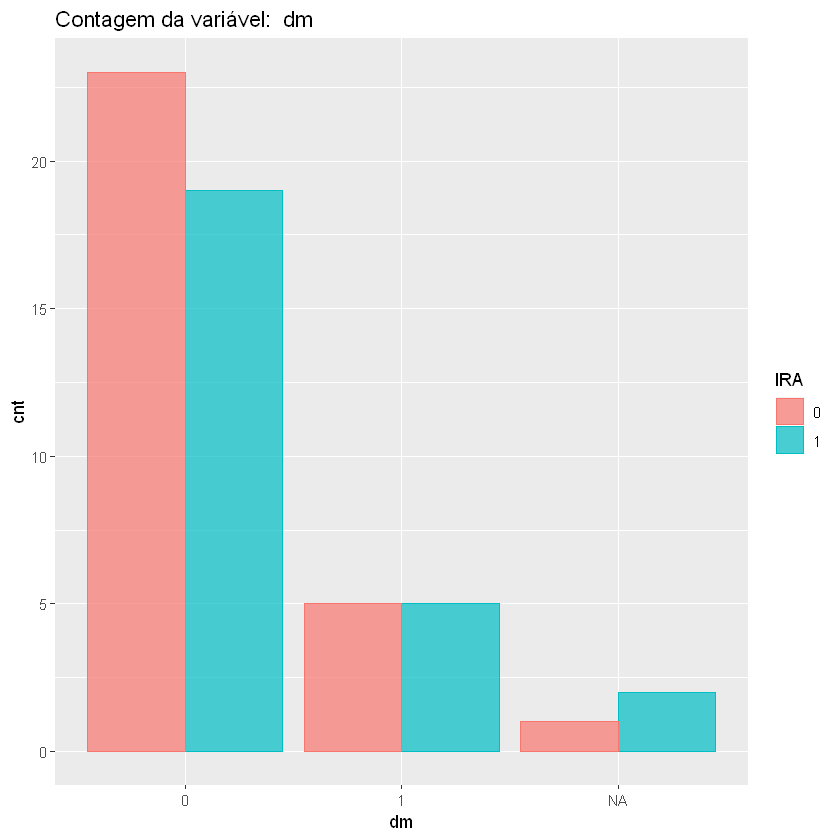

Warning message:
"Factor `hiv` contains implicit NA, consider using `forcats::fct_explicit_na`"

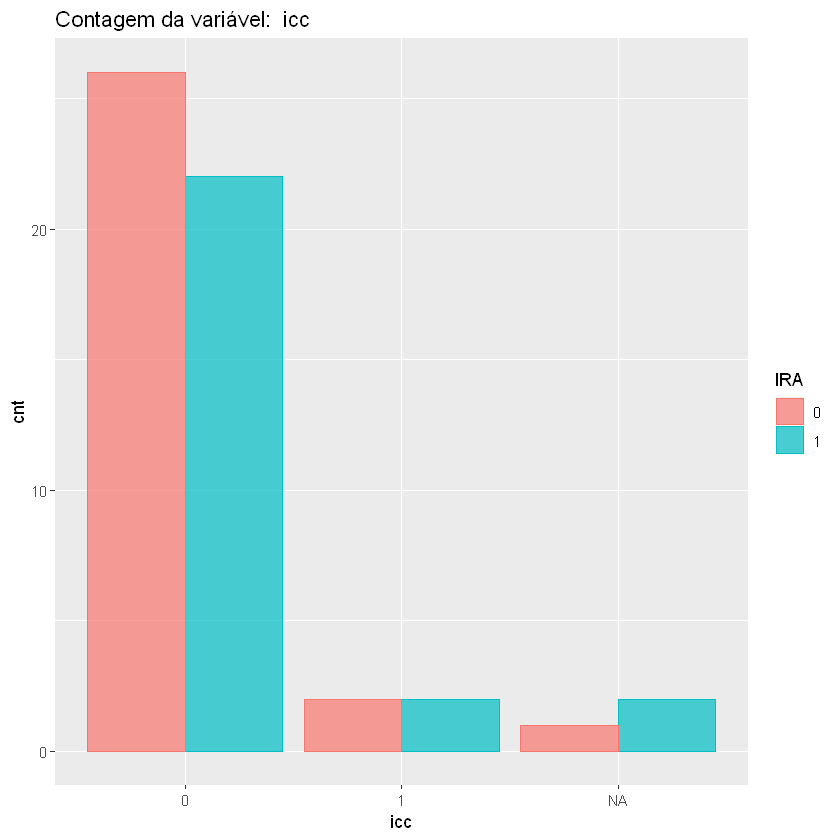

Warning message:
"Factor `ca_ativo` contains implicit NA, consider using `forcats::fct_explicit_na`"

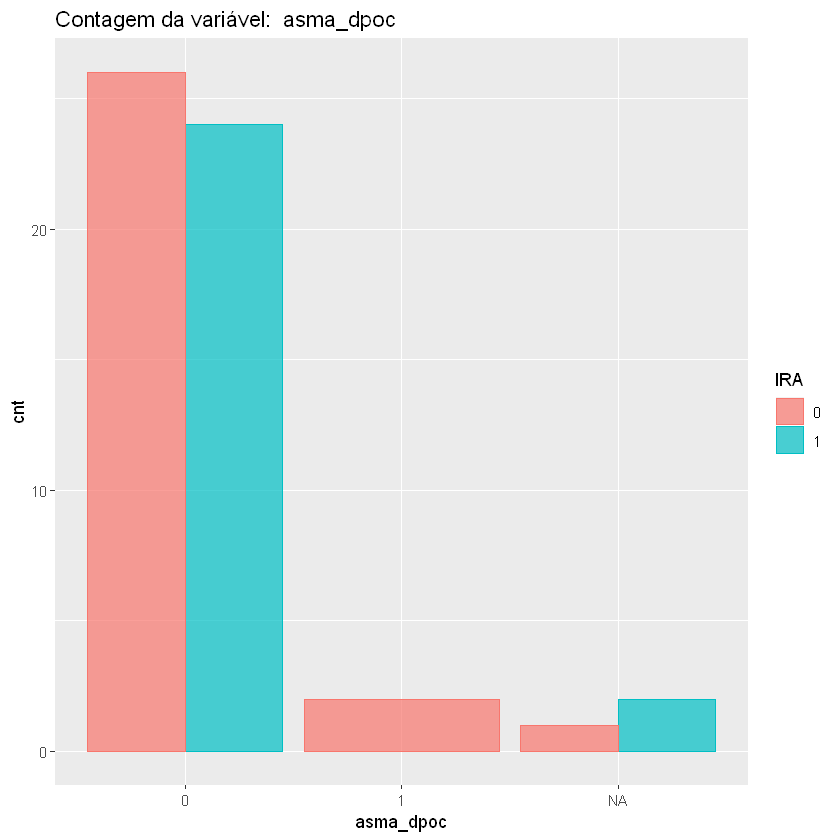

Warning message:
"Factor `avc` contains implicit NA, consider using `forcats::fct_explicit_na`"

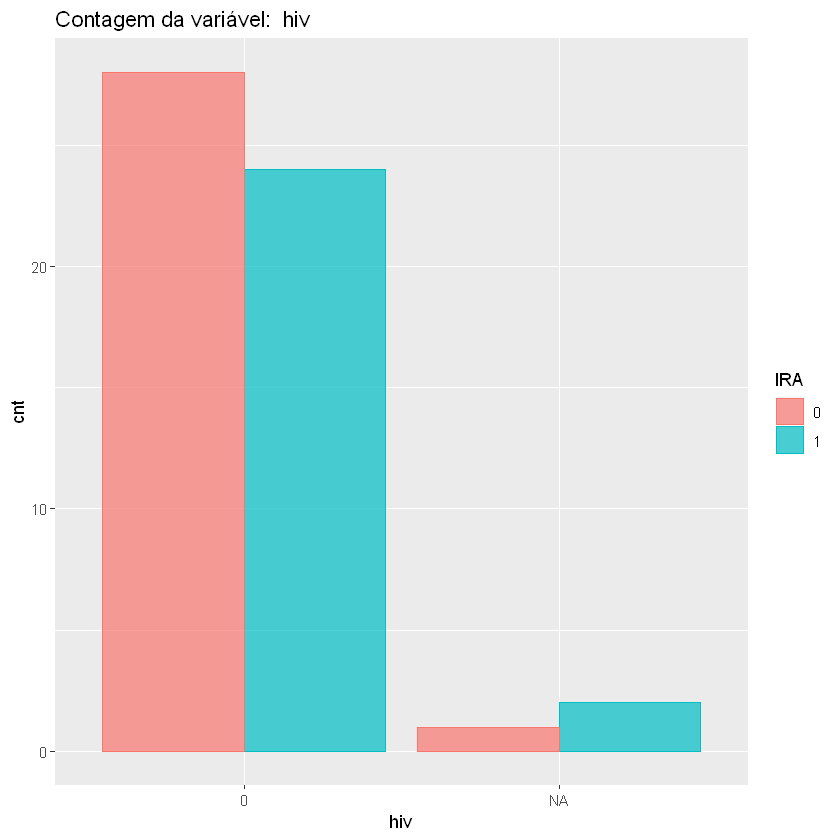

Warning message:
"Factor `dvp` contains implicit NA, consider using `forcats::fct_explicit_na`"

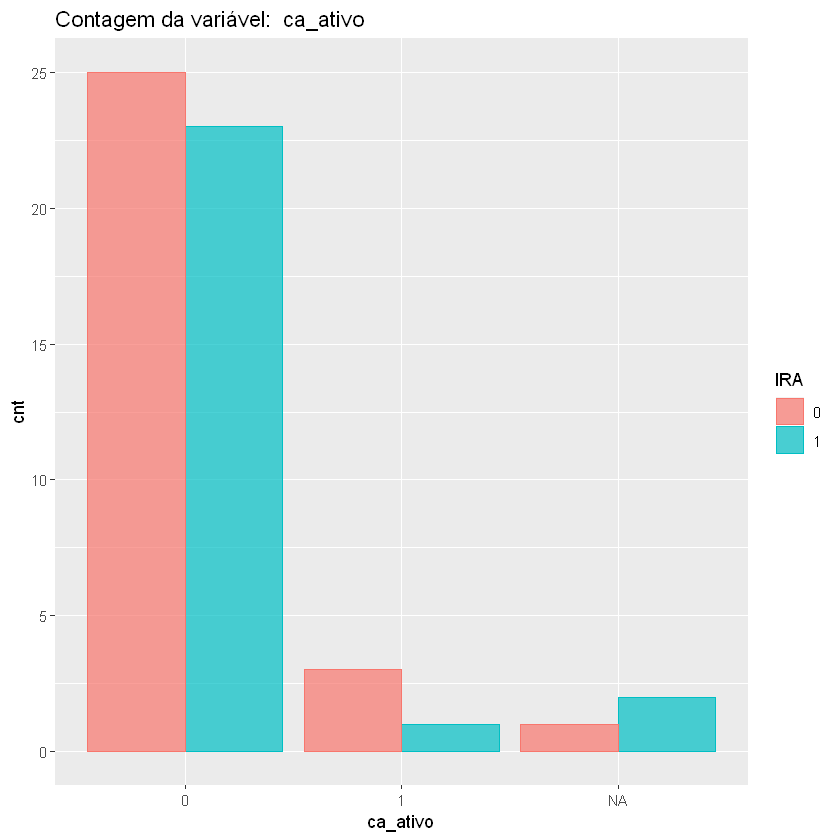

Warning message:
"Factor `drogadicao` contains implicit NA, consider using `forcats::fct_explicit_na`"

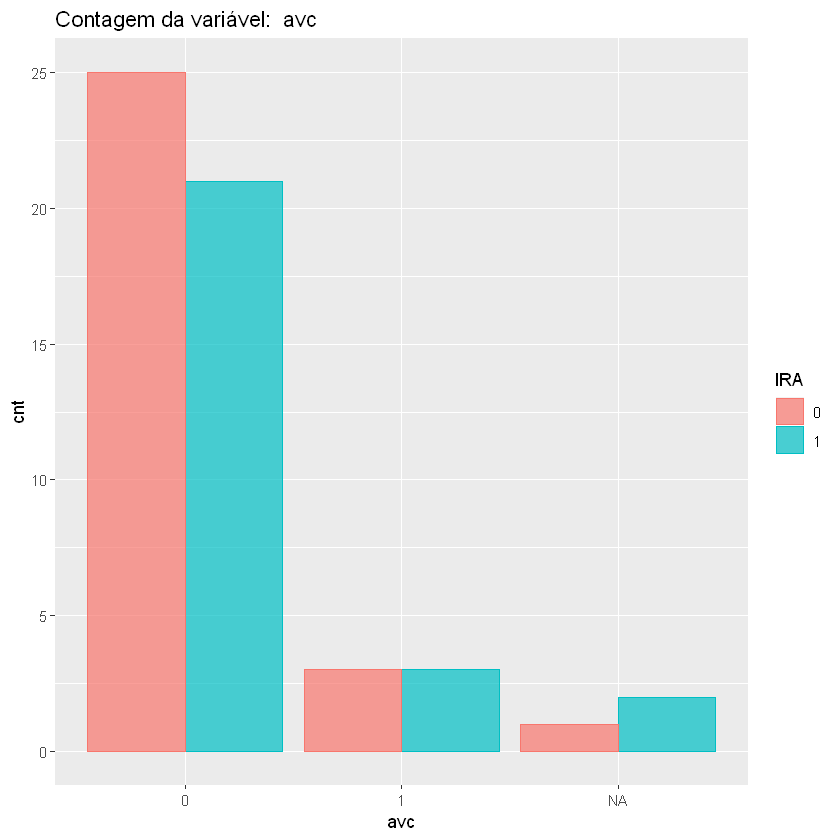

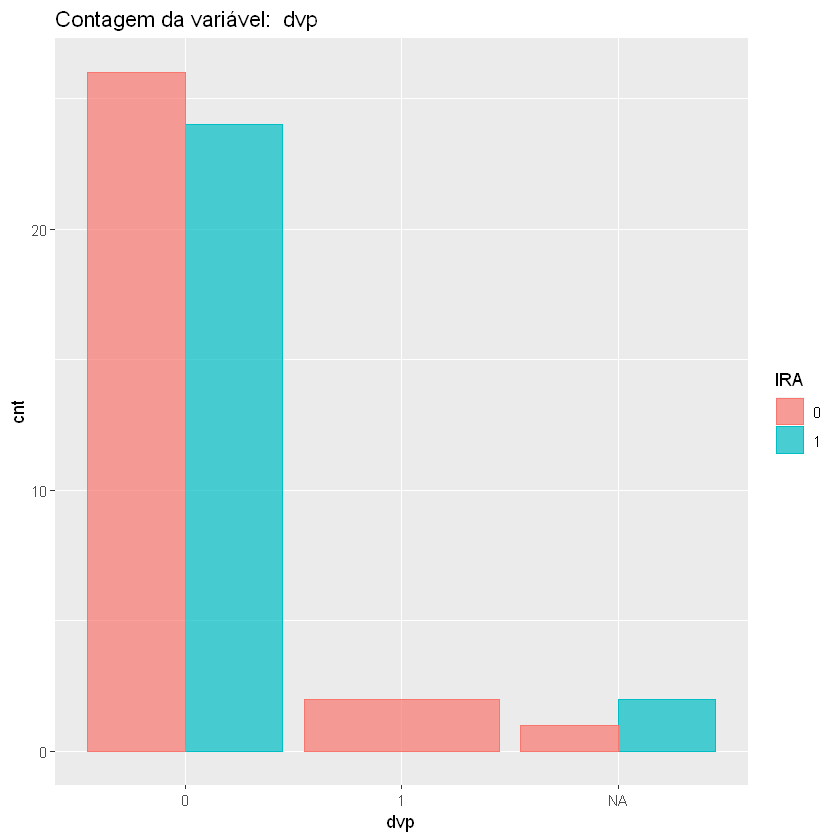

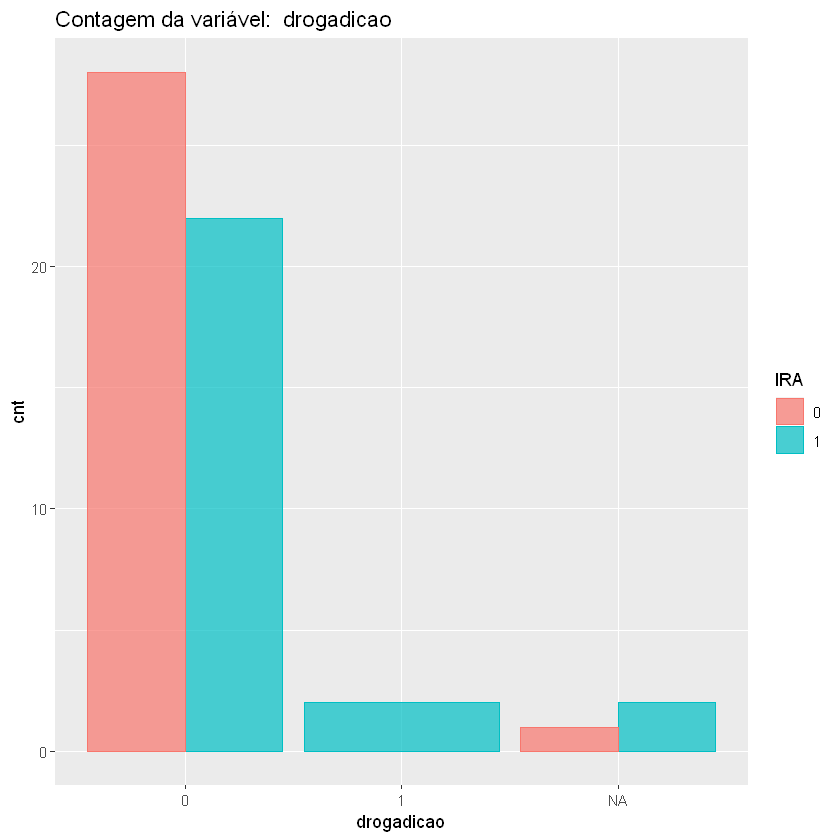

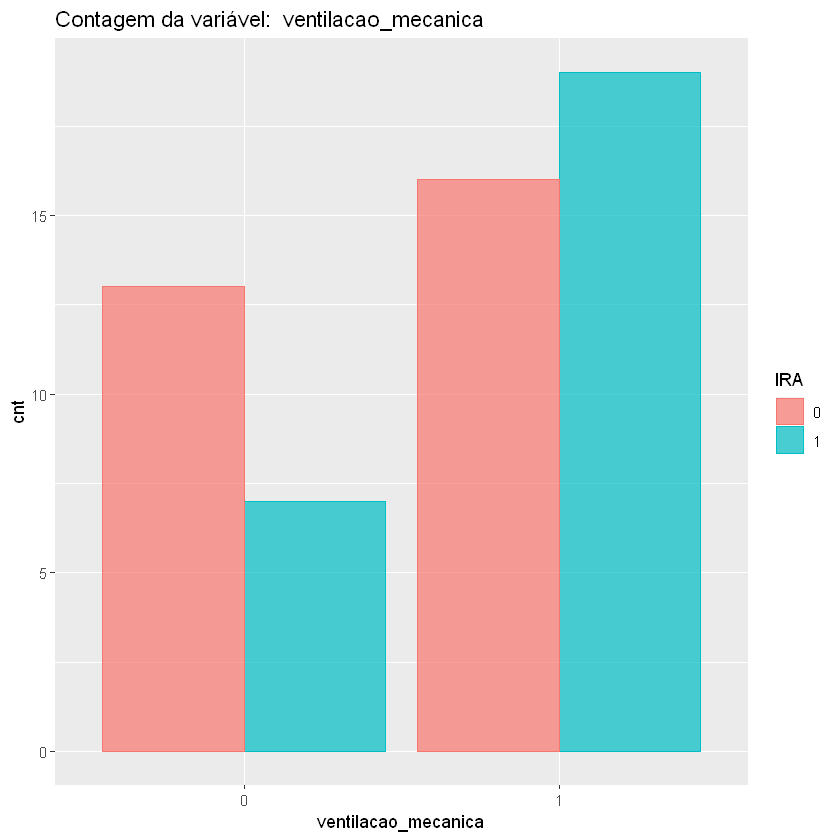

Warning message:
"Factor `iSRAA` contains implicit NA, consider using `forcats::fct_explicit_na`"

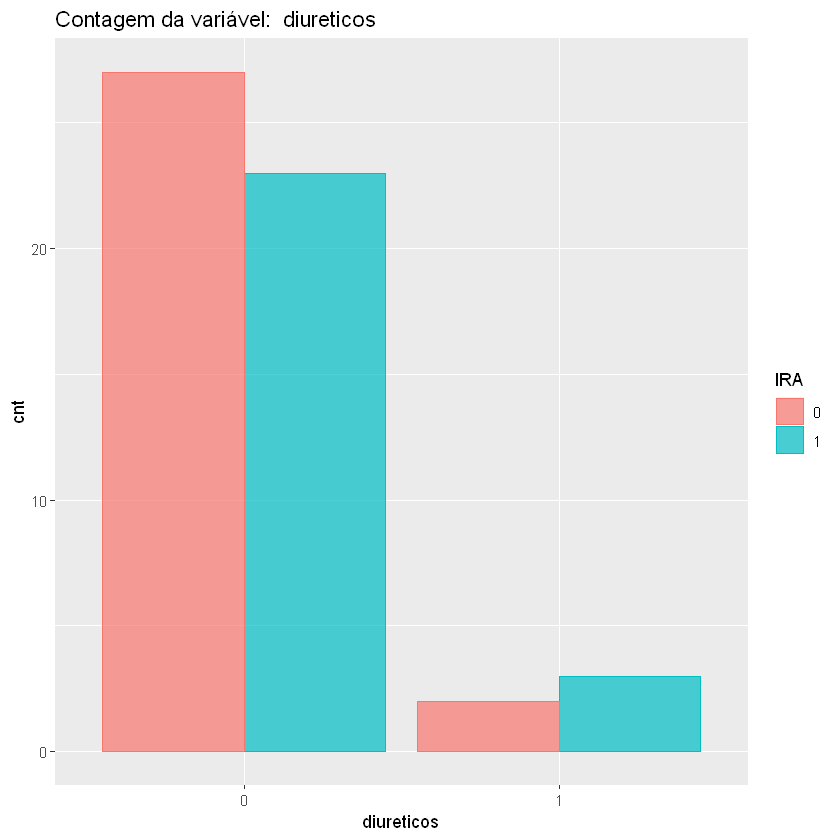

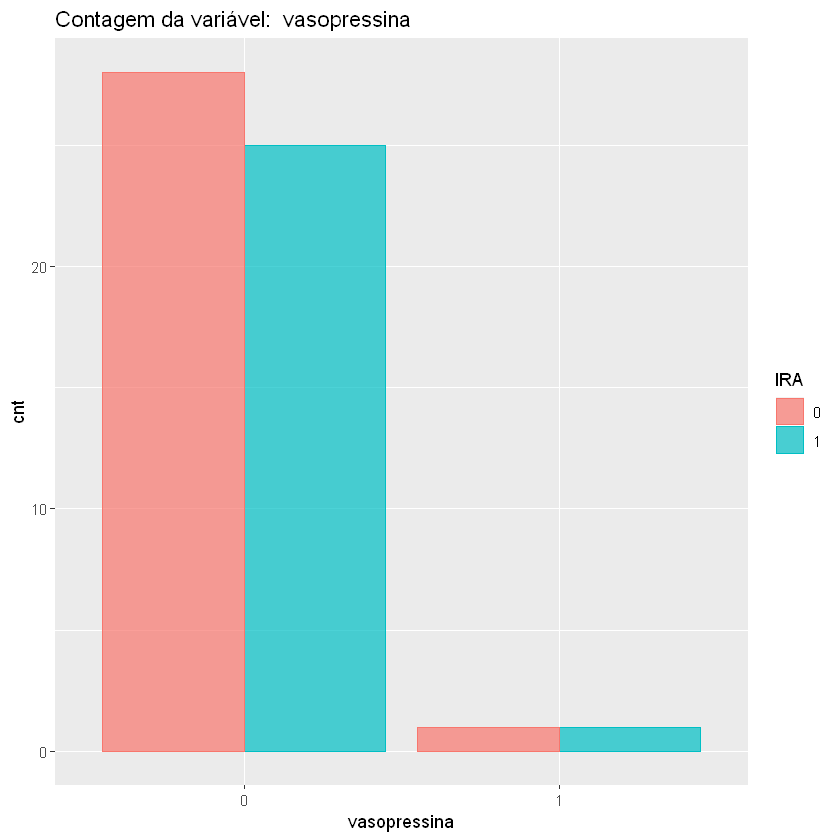

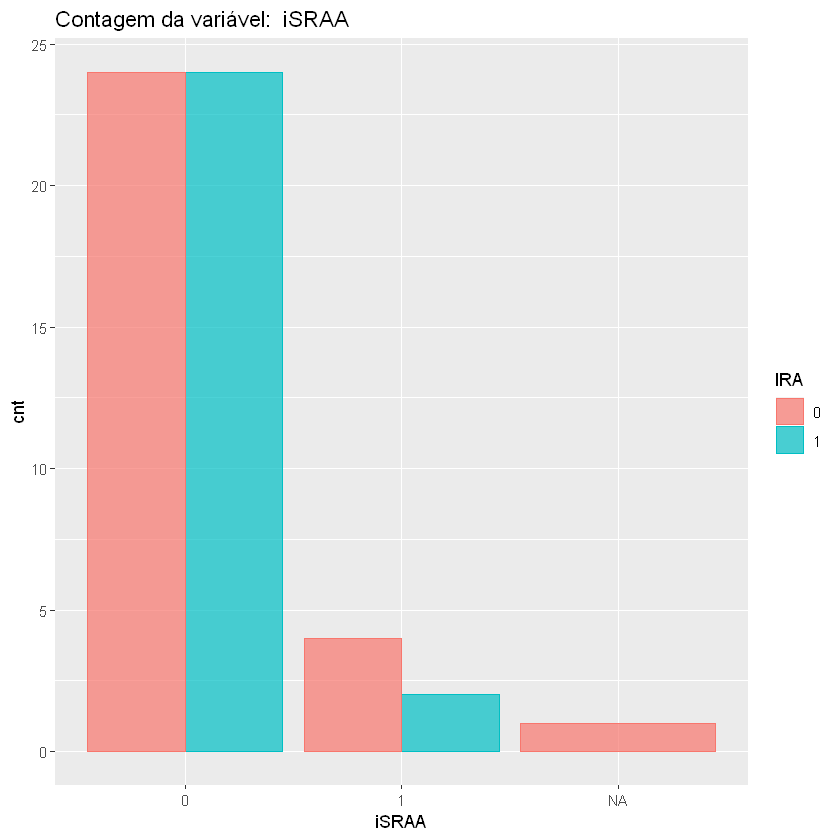

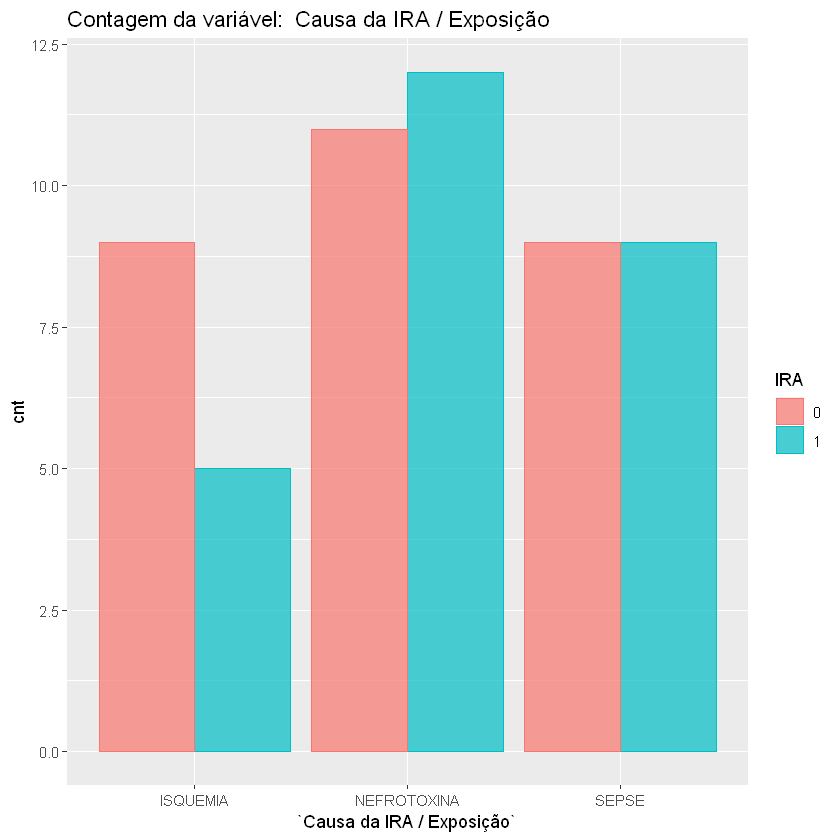

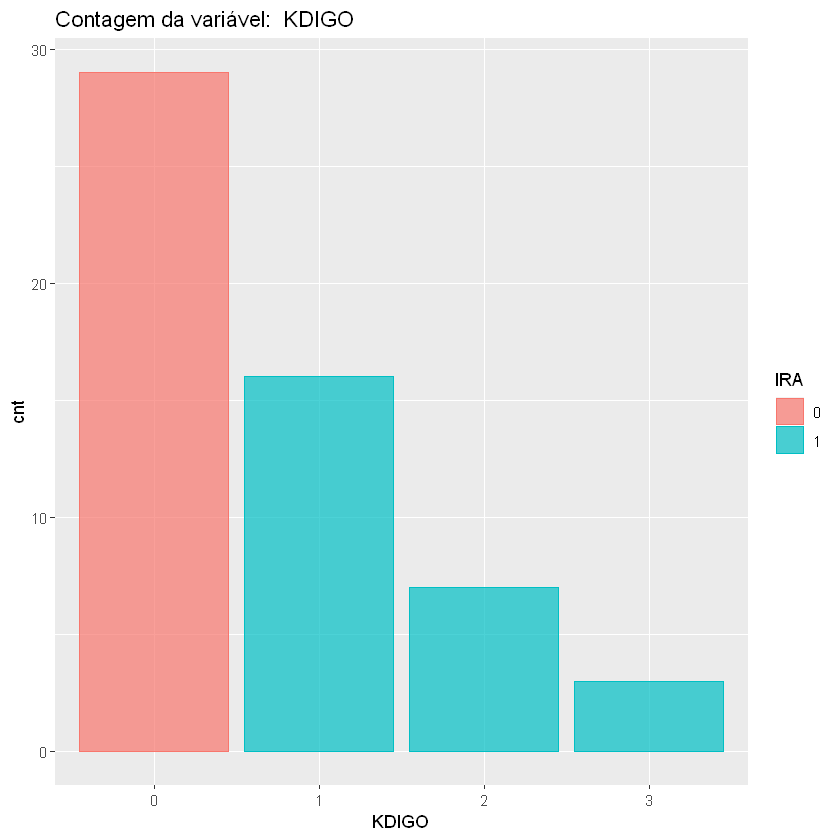

In [89]:
for(column in categorical_columns[categorical_columns != 'D_IRA']){
    p = df %>%
        group_by(!!sym(column), IRA) %>%
        summarise(cnt = n()) %>%
        ggplot(aes(x=!!sym(column), y=cnt,
                   color=IRA, fill=IRA)) + 
            geom_col(alpha=0.7, position='dodge') + 
            labs(title=paste('Contagem da variável: ', column))
    print(p)
}

Warning message:
"Factor `cor` contains implicit NA, consider using `forcats::fct_explicit_na`"Warning message:
"Factor `has` contains implicit NA, consider using `forcats::fct_explicit_na`"Warning message:
"Factor `dm` contains implicit NA, consider using `forcats::fct_explicit_na`"

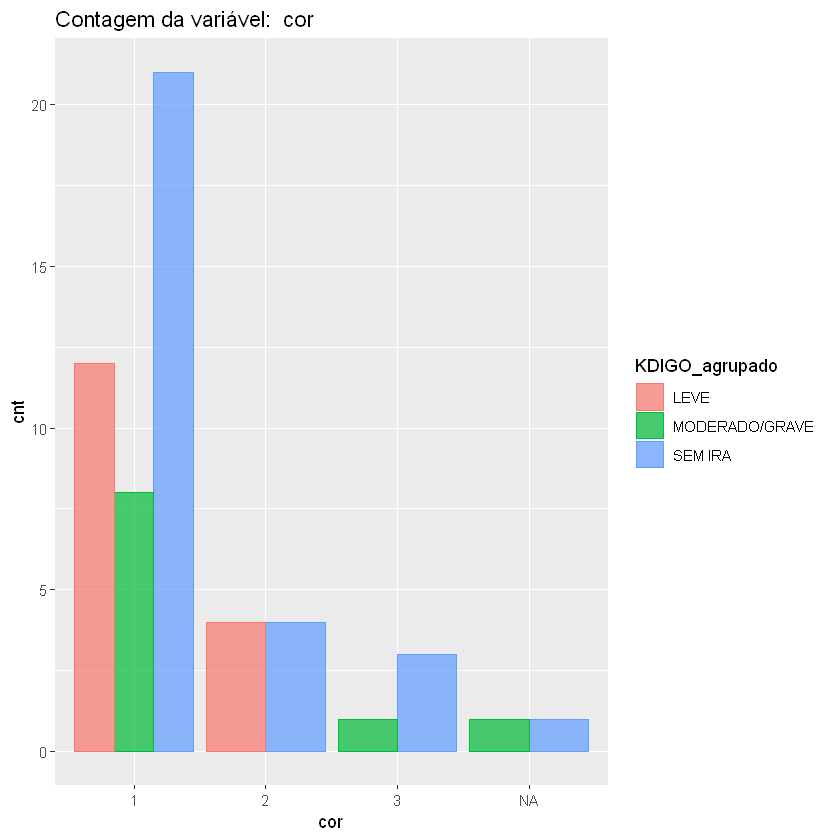

Warning message:
"Factor `icc` contains implicit NA, consider using `forcats::fct_explicit_na`"

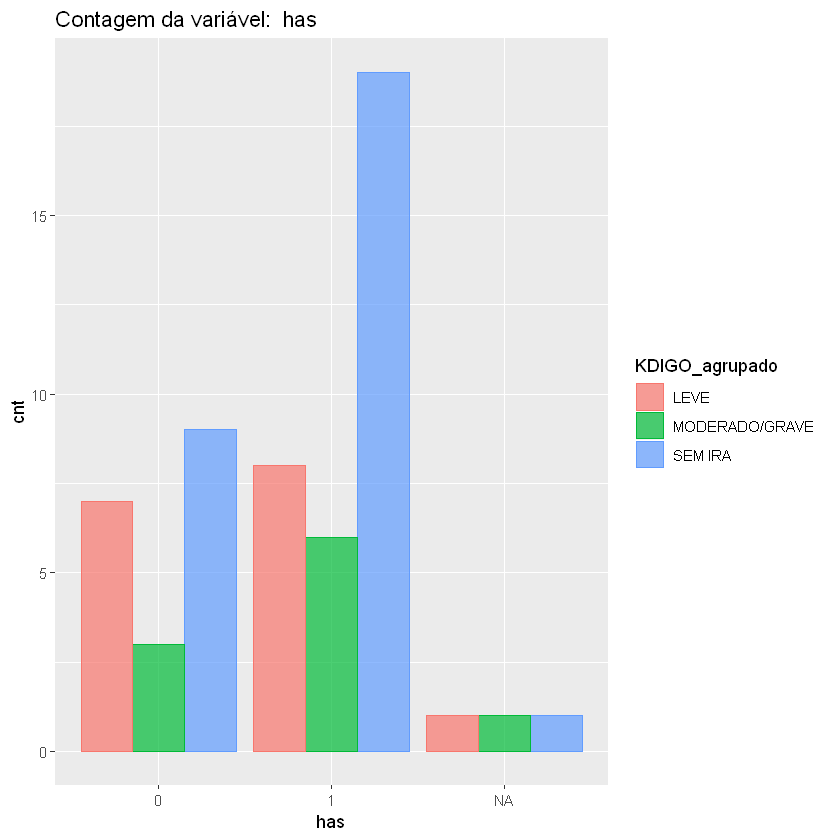

Warning message:
"Factor `asma_dpoc` contains implicit NA, consider using `forcats::fct_explicit_na`"

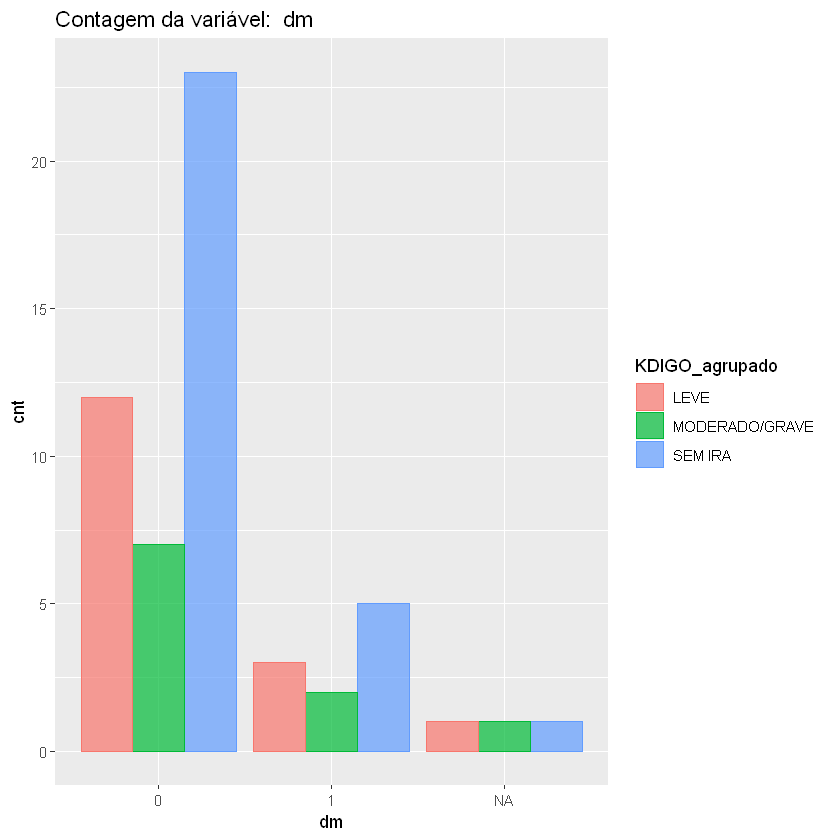

Warning message:
"Factor `hiv` contains implicit NA, consider using `forcats::fct_explicit_na`"

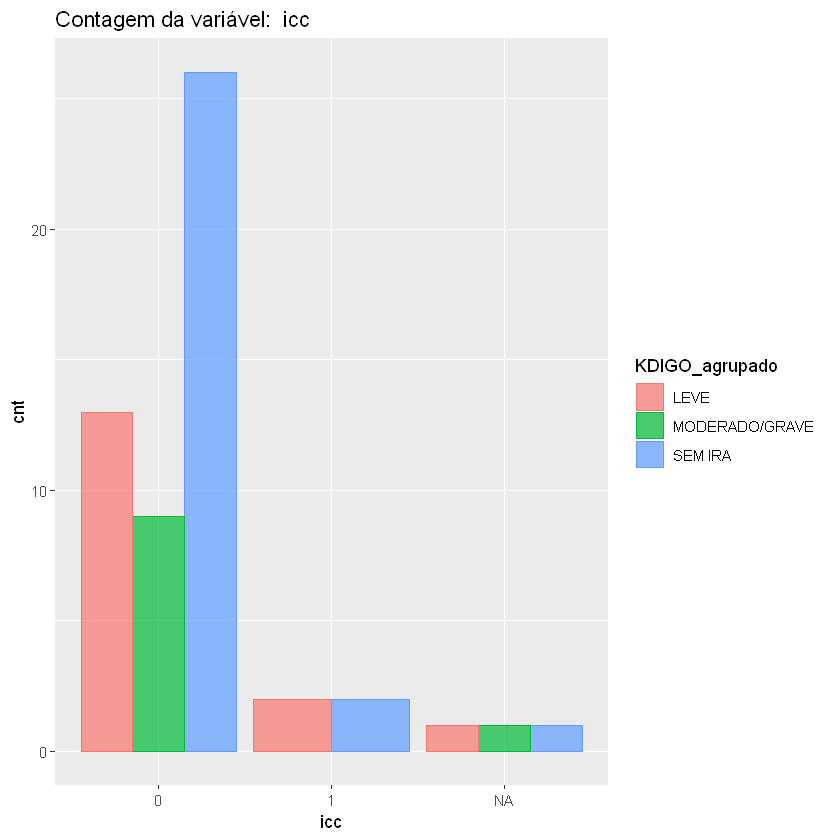

Warning message:
"Factor `ca_ativo` contains implicit NA, consider using `forcats::fct_explicit_na`"

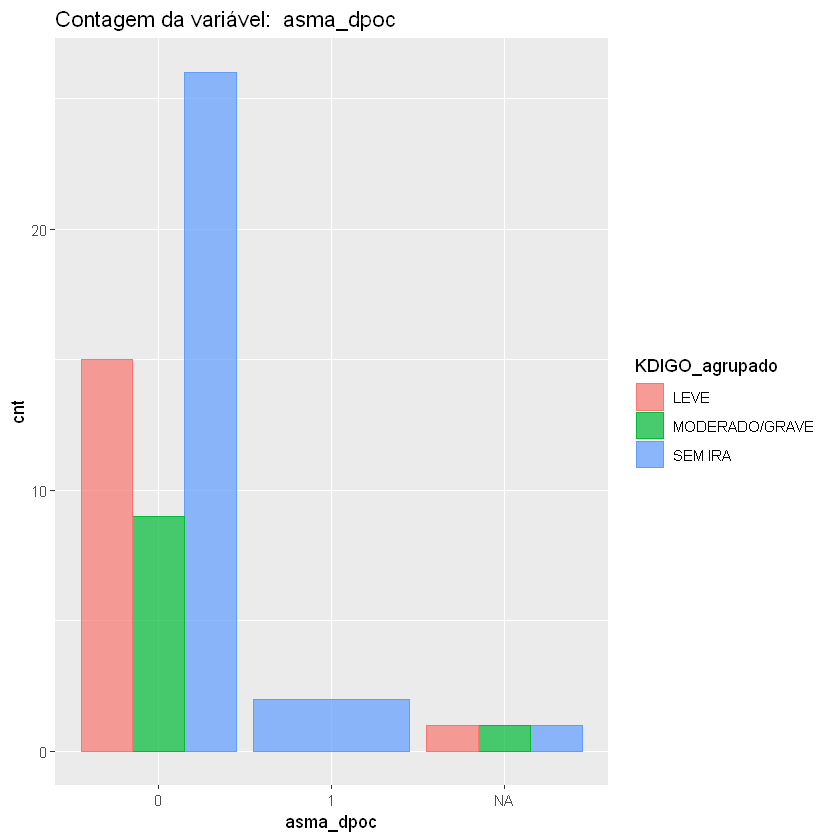

Warning message:
"Factor `avc` contains implicit NA, consider using `forcats::fct_explicit_na`"

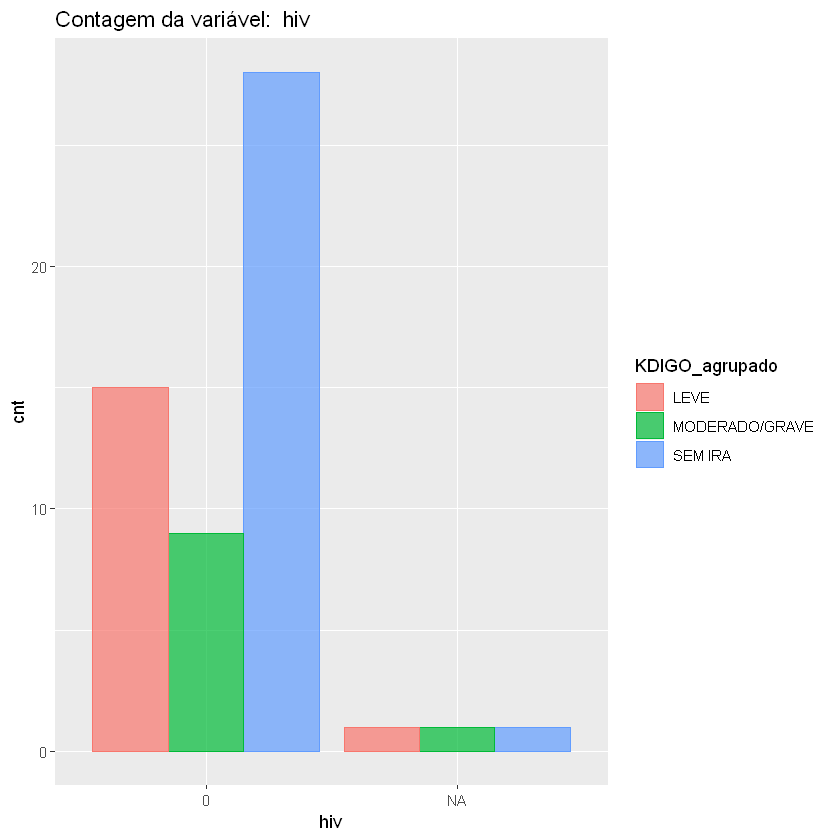

Warning message:
"Factor `dvp` contains implicit NA, consider using `forcats::fct_explicit_na`"

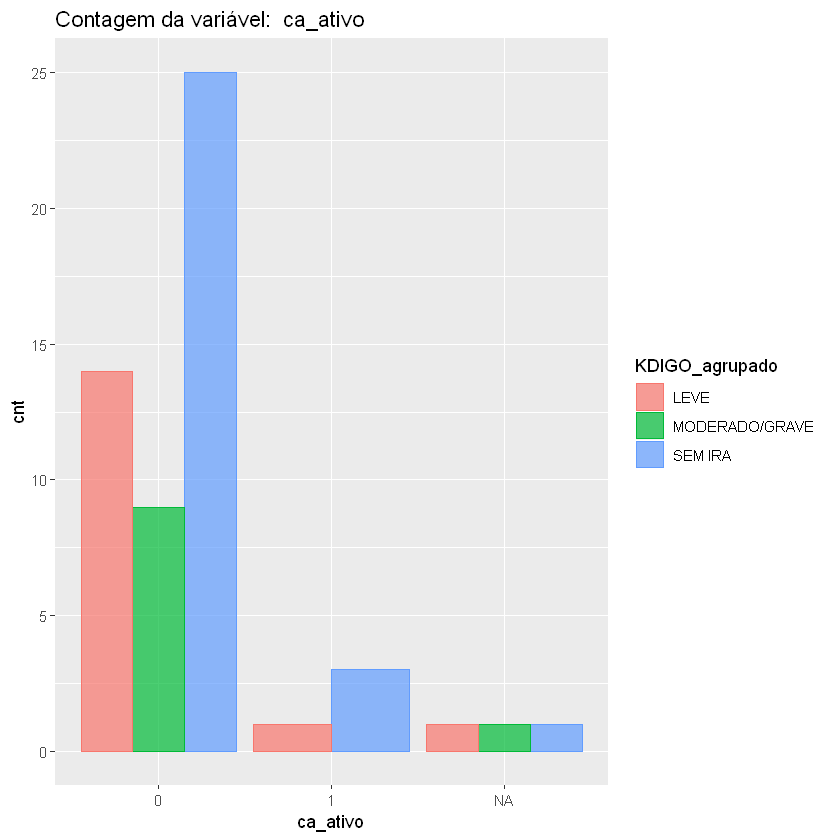

Warning message:
"Factor `drogadicao` contains implicit NA, consider using `forcats::fct_explicit_na`"

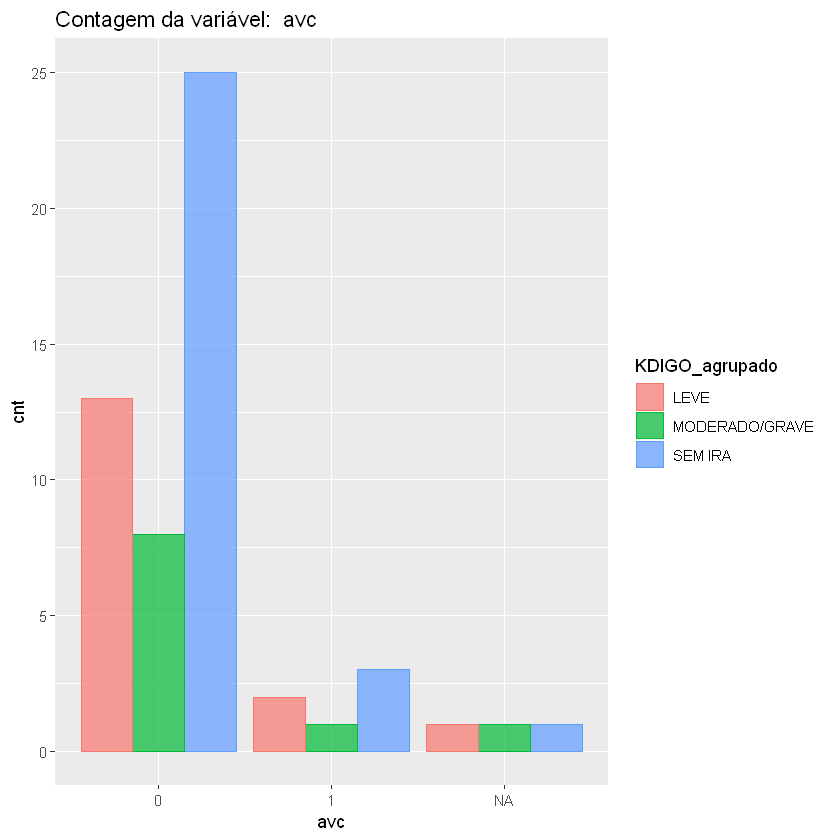

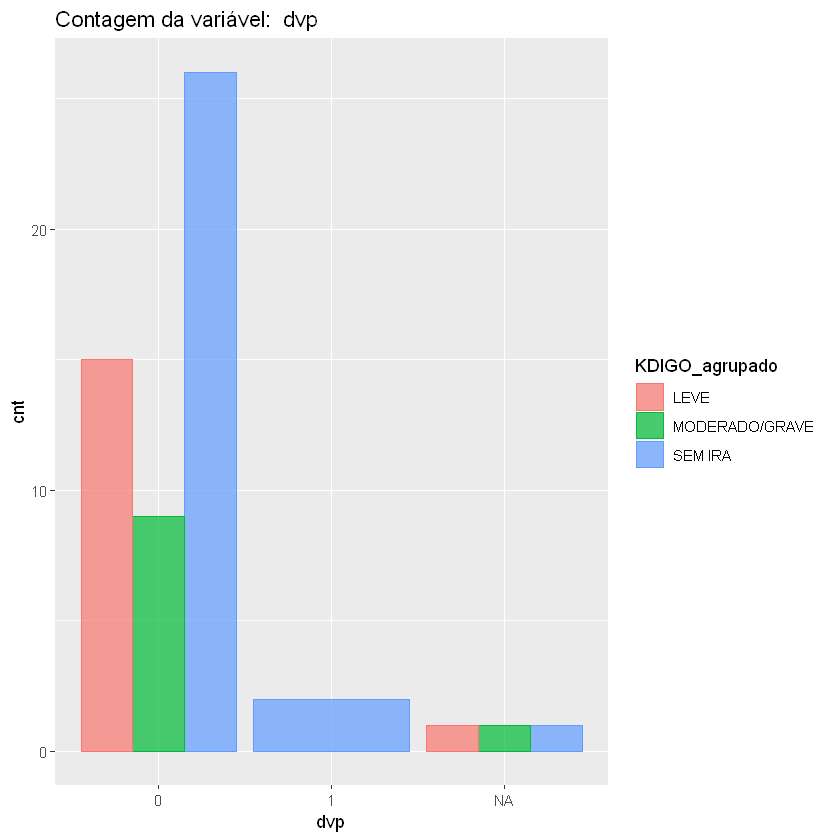

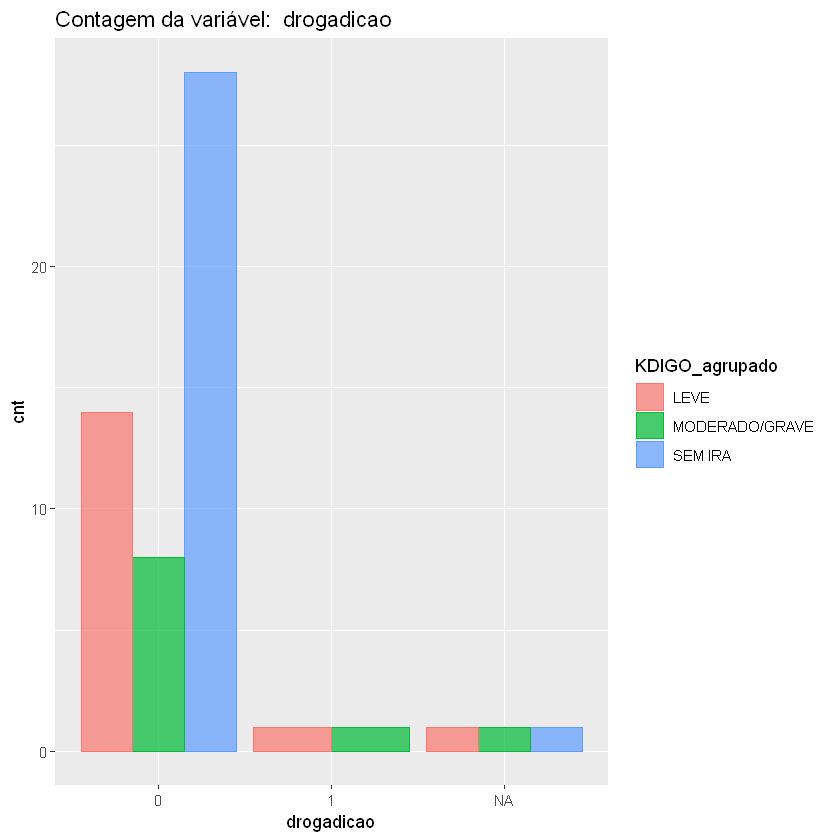

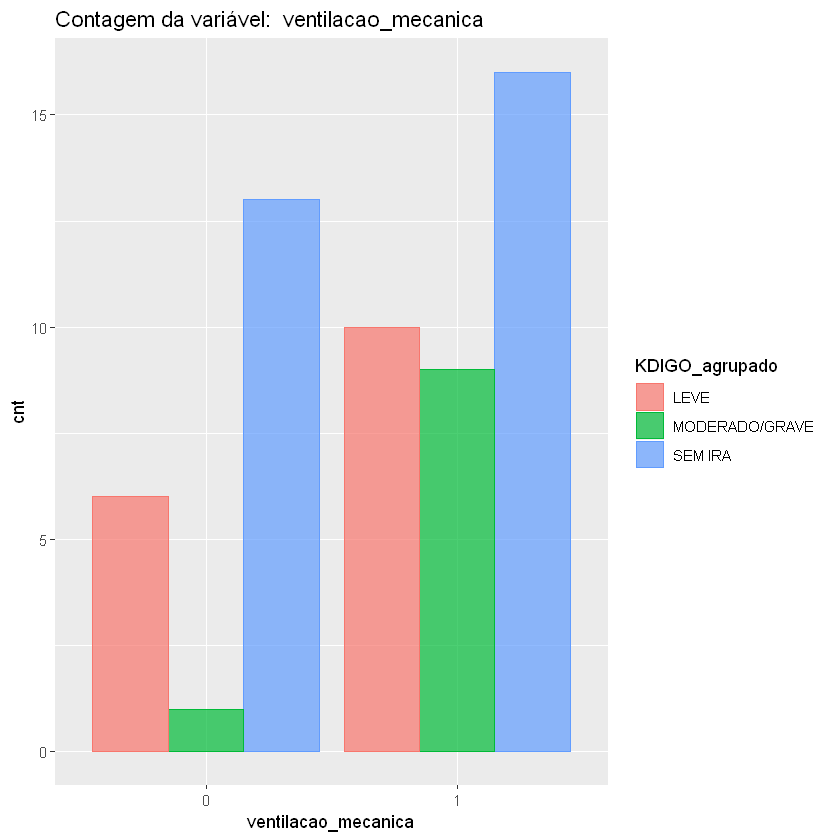

Warning message:
"Factor `iSRAA` contains implicit NA, consider using `forcats::fct_explicit_na`"

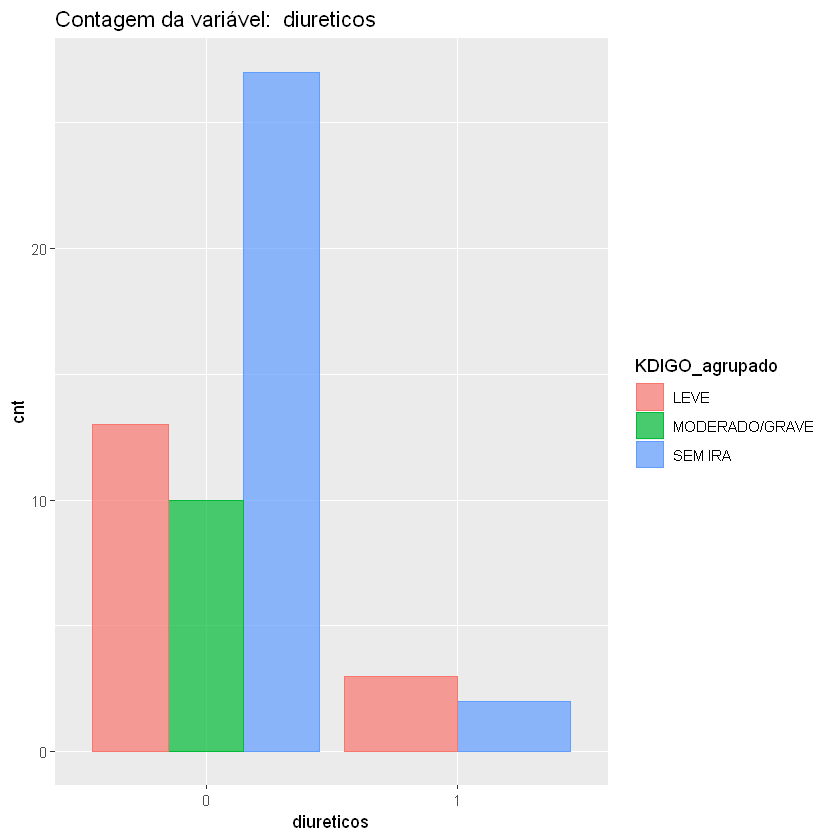

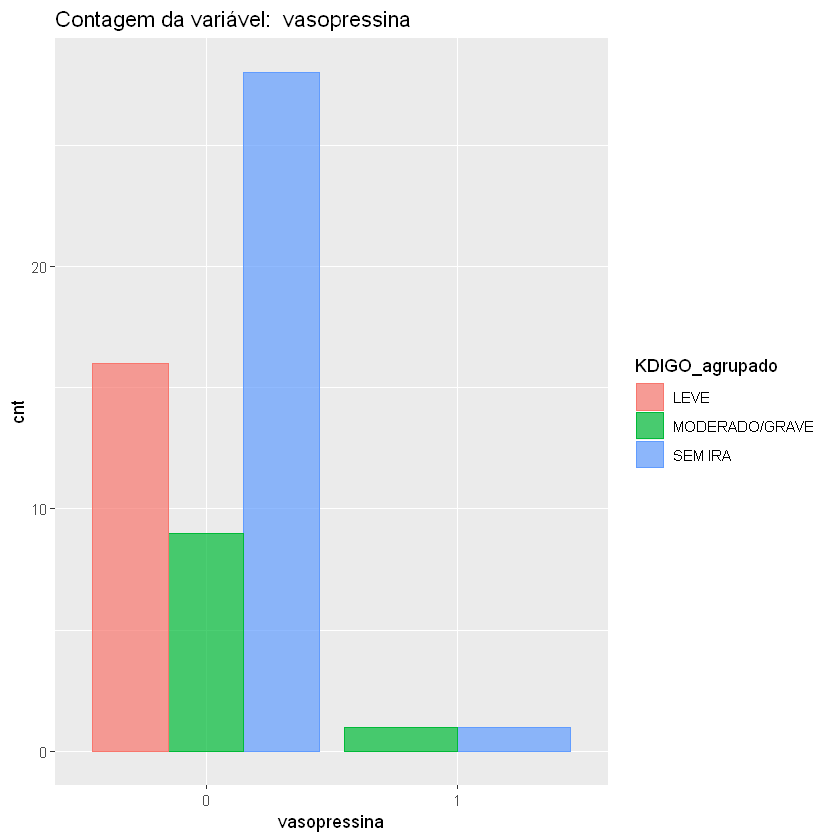

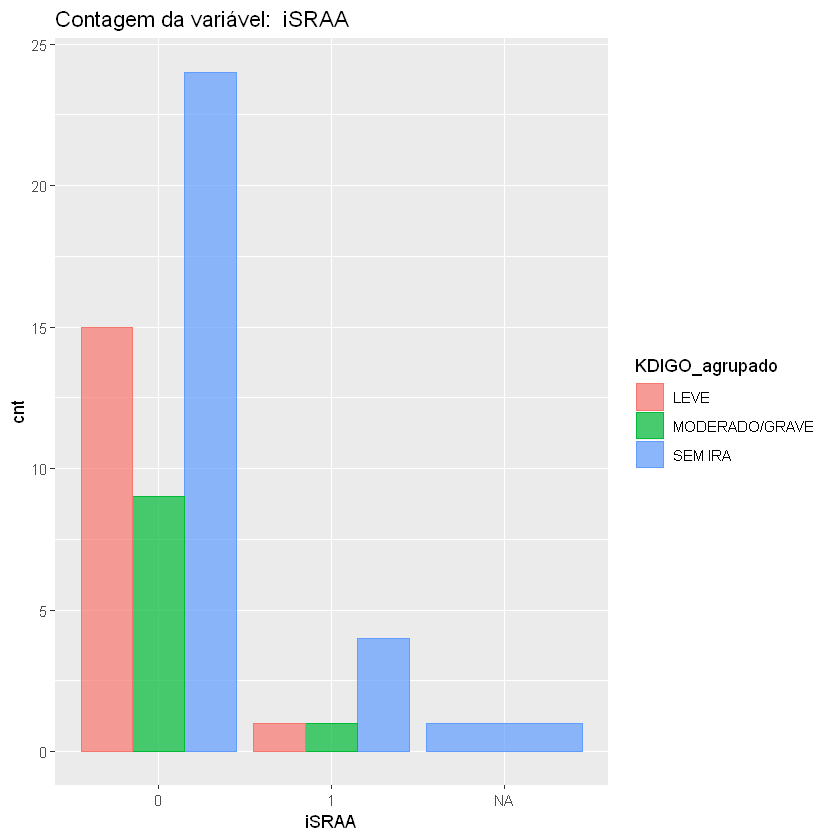

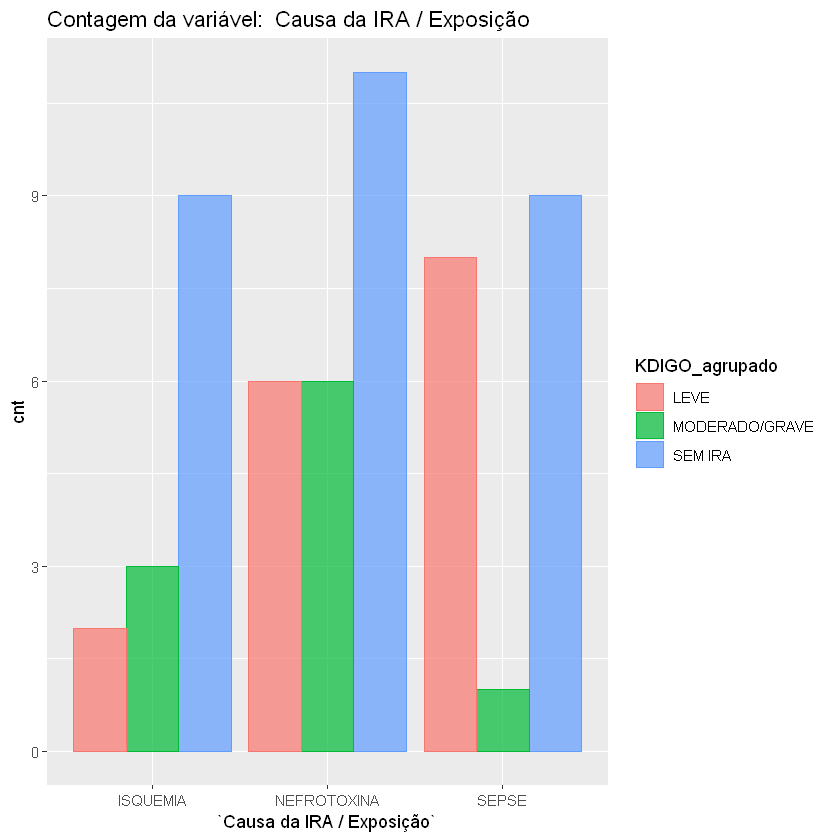

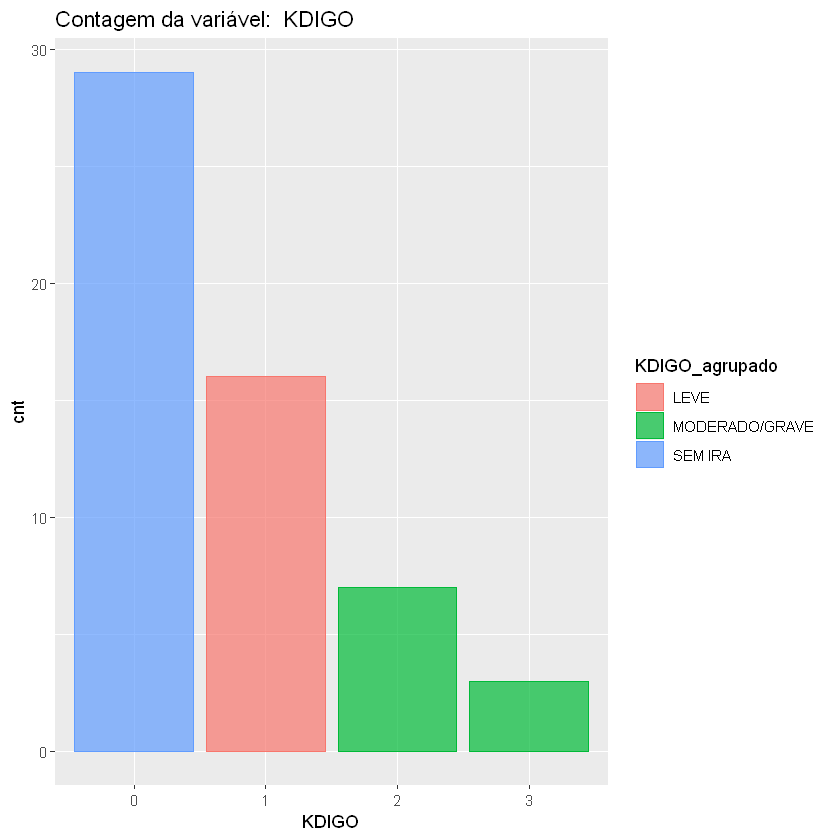

In [90]:
for(column in categorical_columns[categorical_columns != 'D_IRA']){
    p = df %>%
        group_by(!!sym(column), KDIGO_agrupado) %>%
        summarise(cnt = n()) %>%
        ggplot(aes(x=!!sym(column), y=cnt,
                   color=KDIGO_agrupado, fill=KDIGO_agrupado)) + 
            geom_col(alpha=0.7, position='dodge') + 
            labs(title=paste('Contagem da variável: ', column))
    print(p)
}